In [1]:
ls ../csv

co2_pp.csv
energy.csv
energy_production_total.csv
gdp.csv
hdi.csv
hdi_human_development_index.csv
hte.csv
income_per_person_gdppercapita_ppp_inflation_adjusted.csv
ley.csv
pop_tot.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

ept_file = '../csv/energy_production_total.csv' # energy production total
hdi_file = '../csv/hdi_human_development_index.csv' # human development index
gdp_file = '../csv/income_per_person_gdppercapita_ppp_inflation_adjusted.csv'# income per person gdp

hte_file = '../csv/hte.csv' # high-tech exports
ley_file = '../csv/ley.csv' # life expectancy years
co2_file = '../csv/co2_pp.csv' # co2 emmissions per person

pop_file = '../csv/pop_tot.csv' # total population

In [3]:
ept_df = pd.read_csv(ept_file).set_index('country')
hdi_df = pd.read_csv(hdi_file).set_index('country')
gdp_df = pd.read_csv(gdp_file).set_index('country')

#hte_df = pd.read_csv(hte_file).set_index('country')
ley_df = pd.read_csv(ley_file).set_index('country')
co2_df = pd.read_csv(co2_file).set_index('country')

pop_df = pd.read_csv(pop_file).set_index('country')

In [4]:
all_df = pd.concat([ept_df, hdi_df, gdp_df, ley_df, co2_df, pop_df], keys=['ept', 'hdi', 'gdp', 'ley', 'co2', 'pop'], join='inner').sort_values('country')

In [5]:
all_df = all_df.reset_index().rename(columns={'level_0': 'info_type'})

In [6]:
all_df.set_index(['country', 'info_type'], inplace=True)

In [7]:
all_df.columns = all_df.columns.astype('datetime64[ns]')

In [8]:
all_df.loc['Afghanistan'].index

Index(['gdp', 'hdi', 'ley', 'co2', 'pop'], dtype='object', name='info_type')

Text(0.5, 1.0, 'Albania')

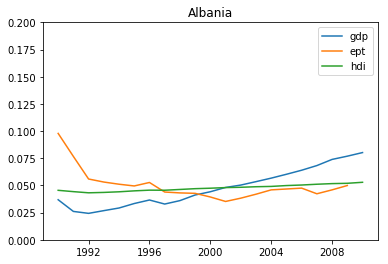

In [9]:
plt.plot(all_df.loc['Albania'].transpose()['gdp']/all_df.loc['Albania'].transpose().sum()['gdp'])
plt.plot(all_df.loc['Albania'].transpose()['ept']/all_df.loc['Albania'].transpose().sum()['ept'])
plt.plot(all_df.loc['Albania'].transpose()['hdi']/all_df.loc['Albania'].transpose().sum()['hdi'])
plt.legend()
plt.ylim(0.0,.2)
plt.title('Albania')

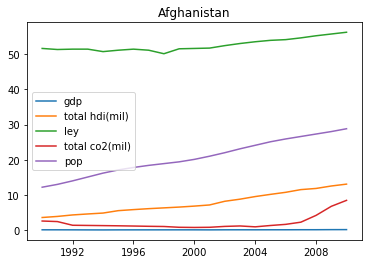

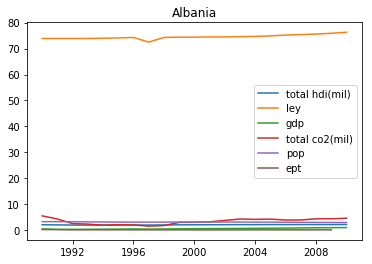

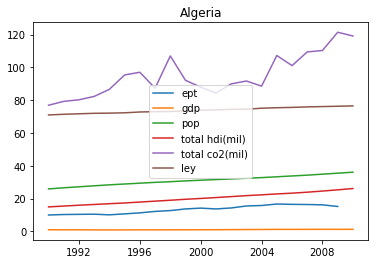

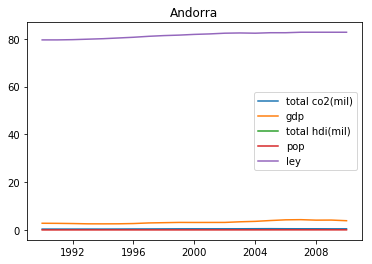

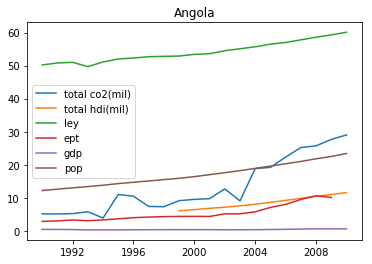

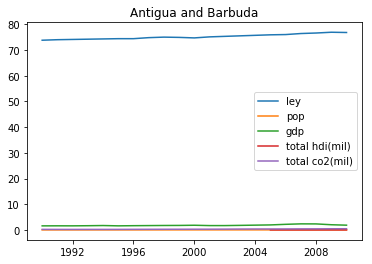

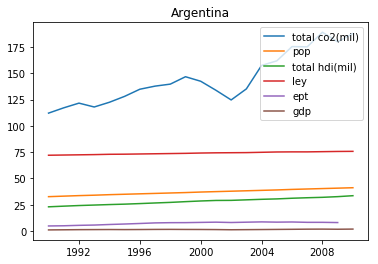

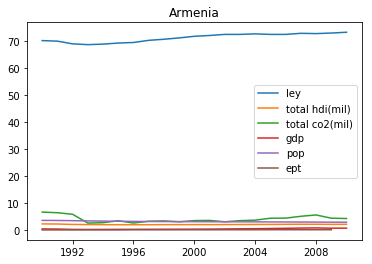

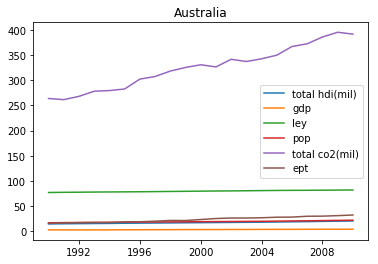

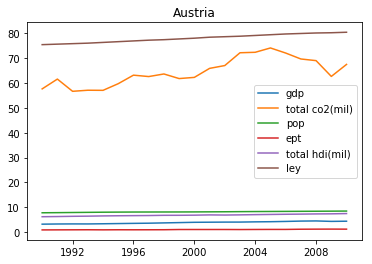

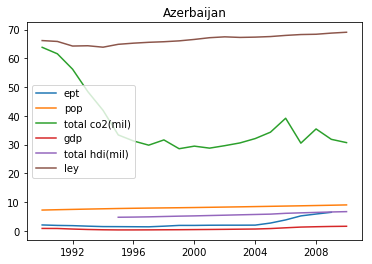

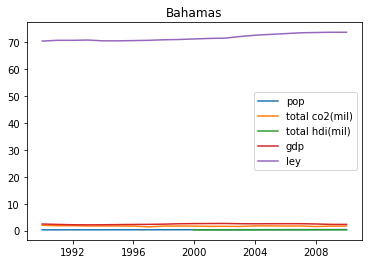

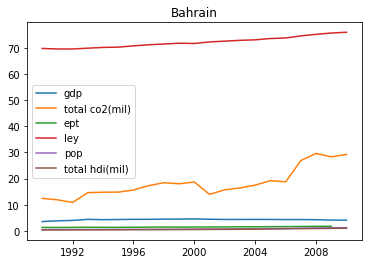

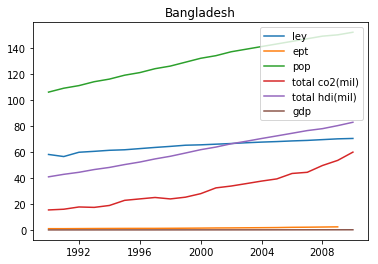

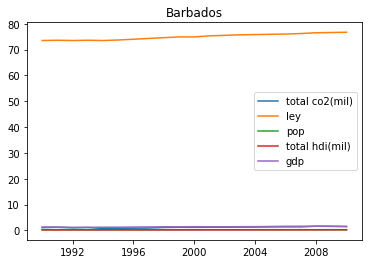

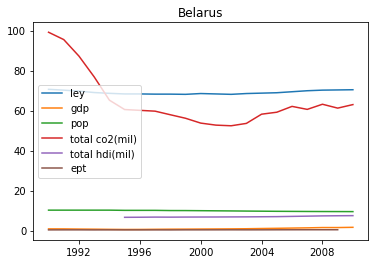

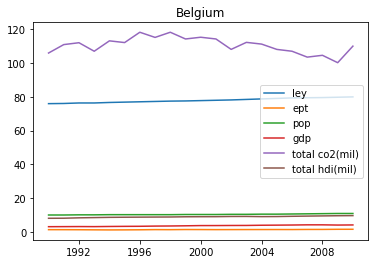

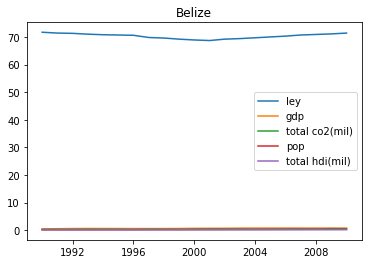

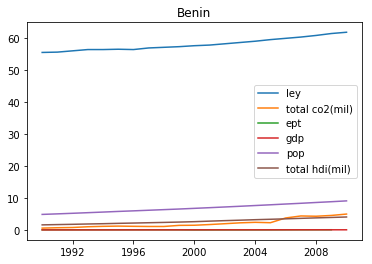

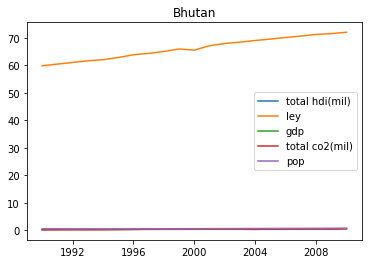

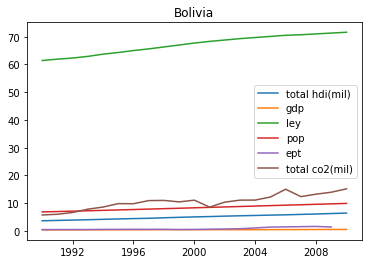

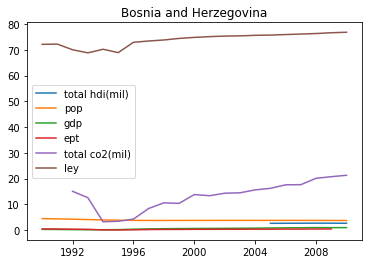

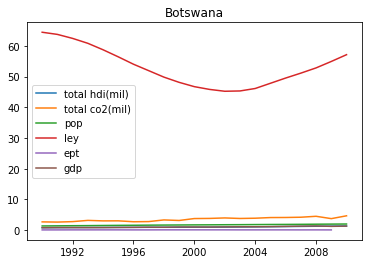

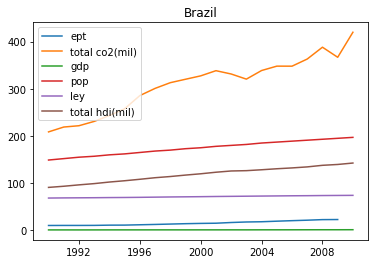

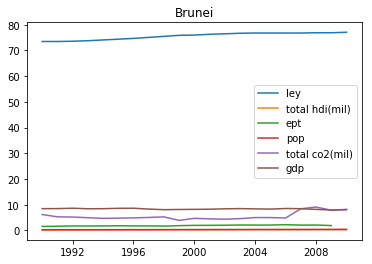

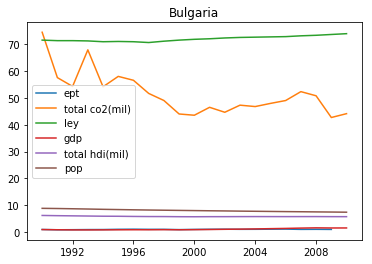

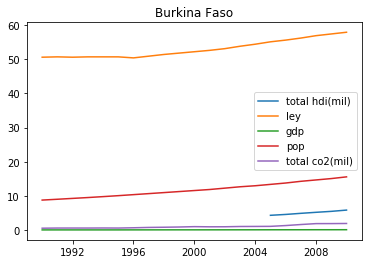

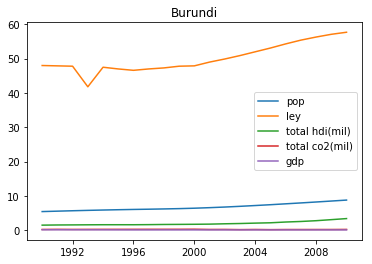

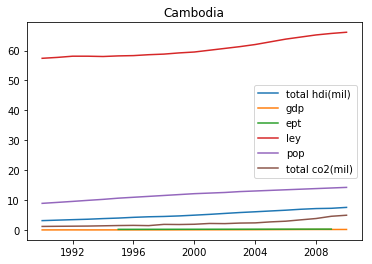

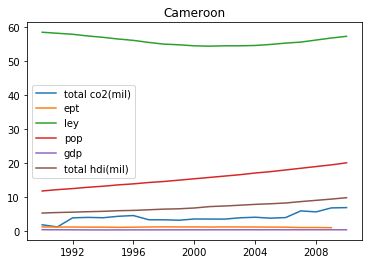

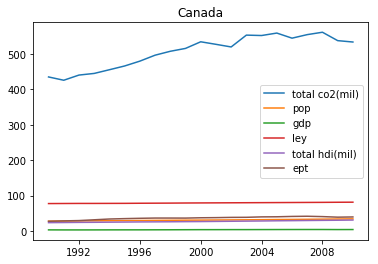

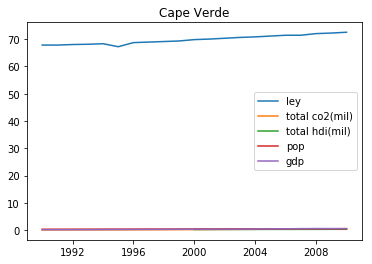

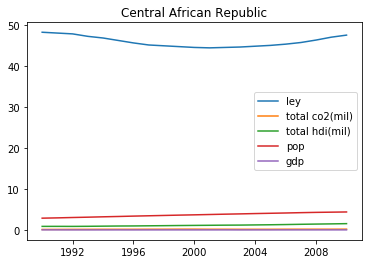

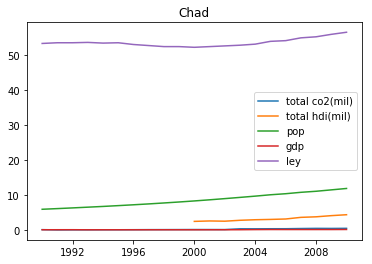

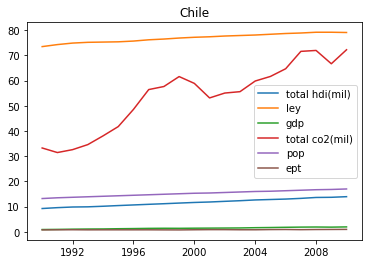

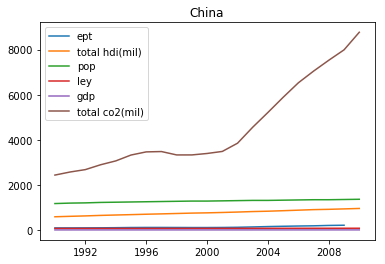

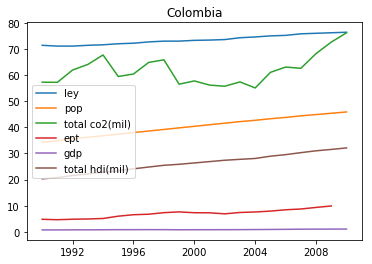

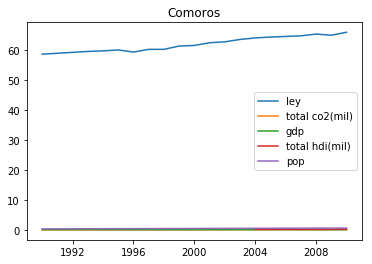

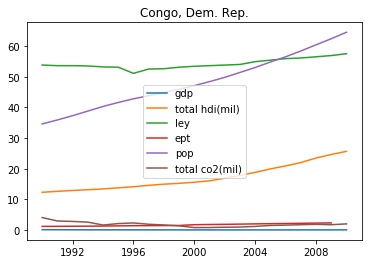

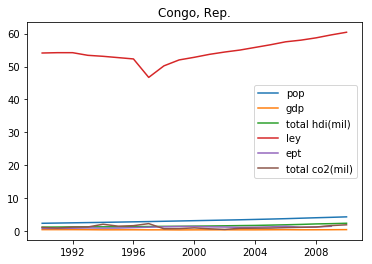

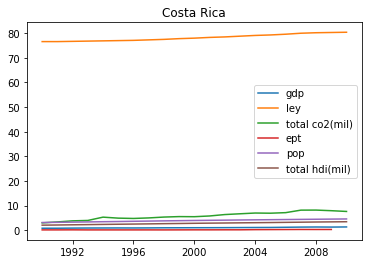

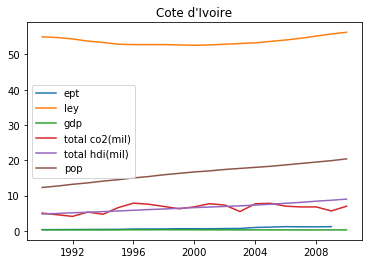

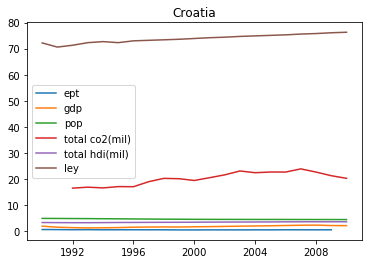

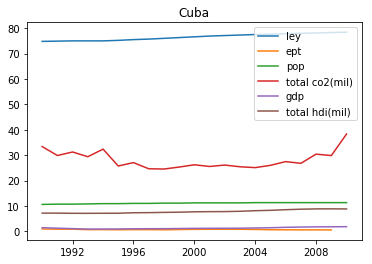

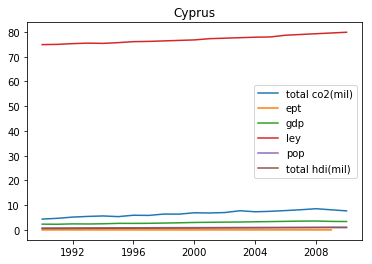

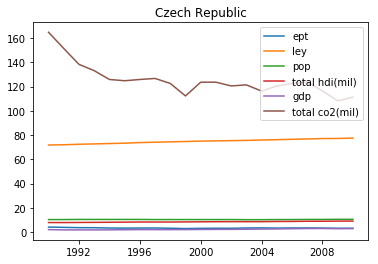

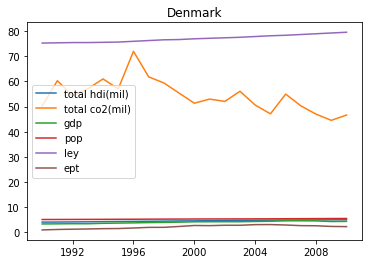

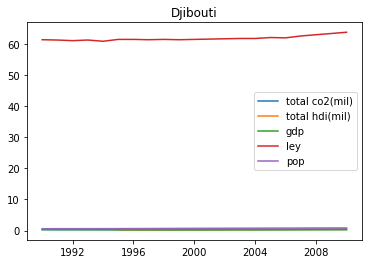

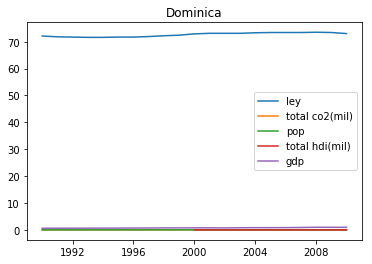

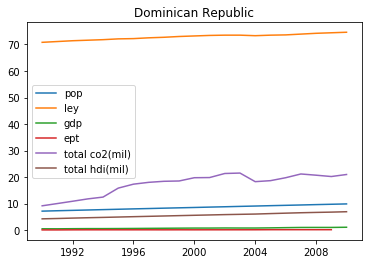

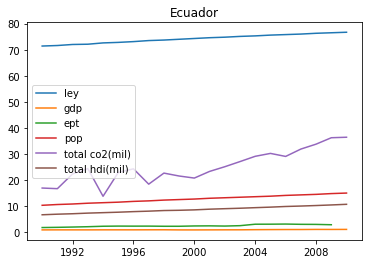

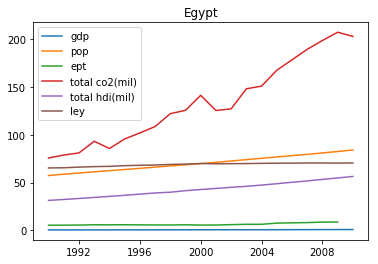

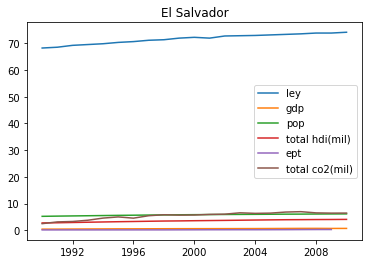

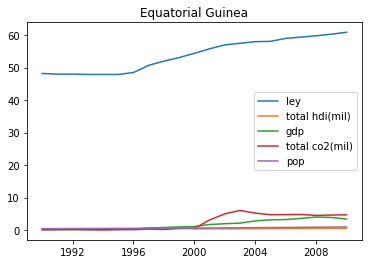

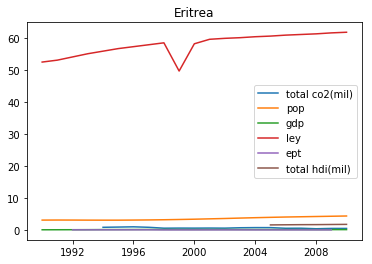

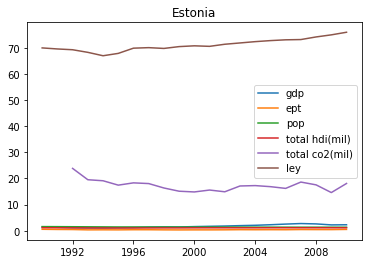

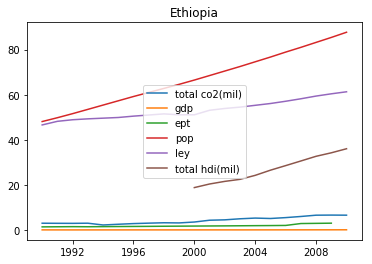

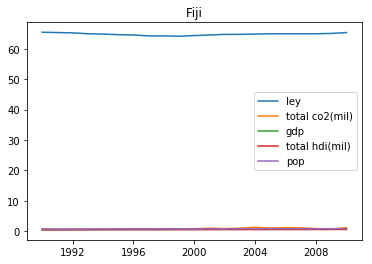

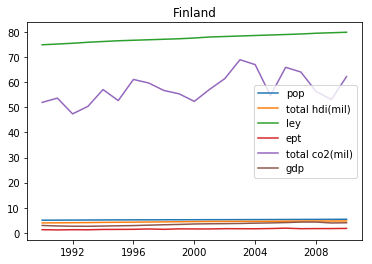

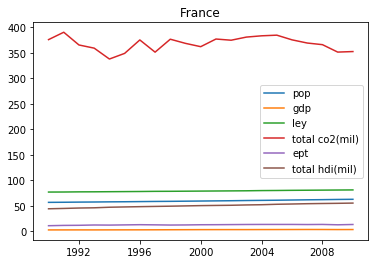

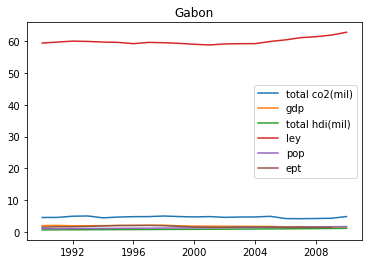

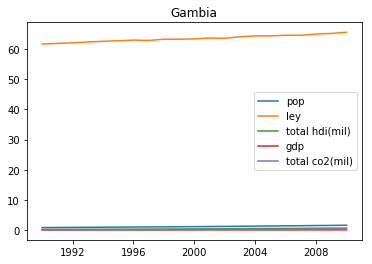

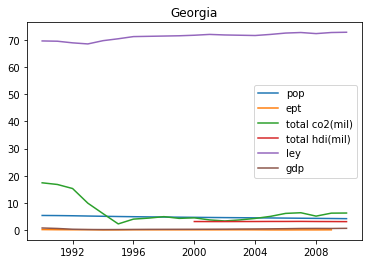

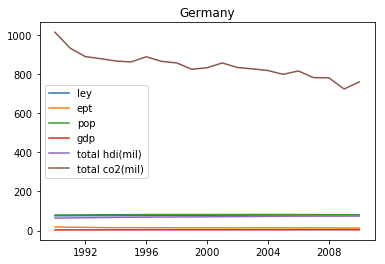

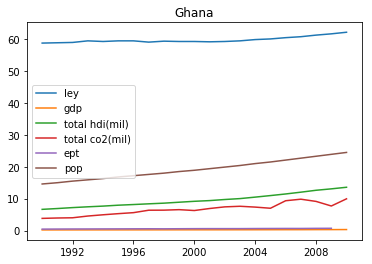

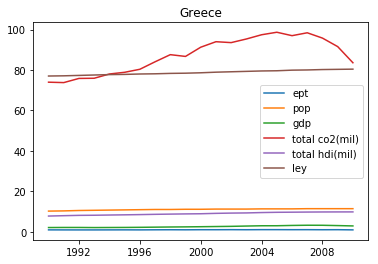

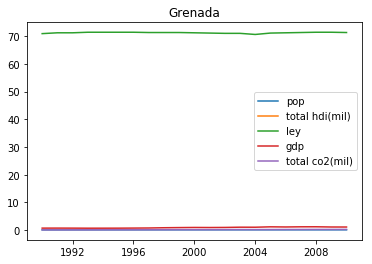

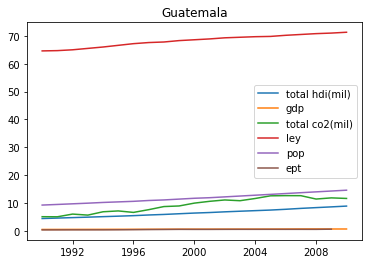

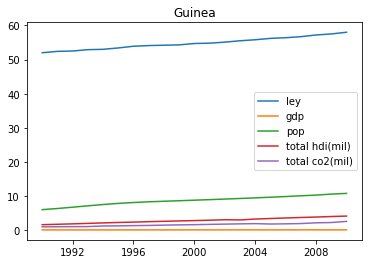

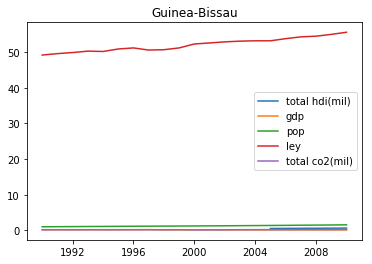

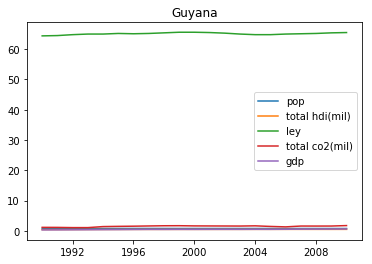

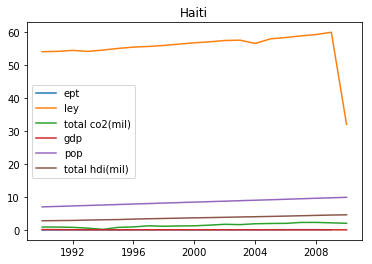

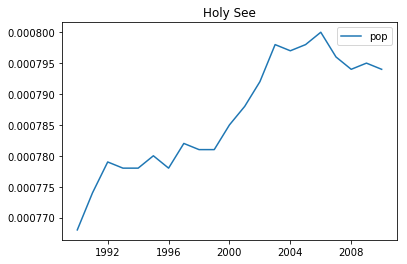

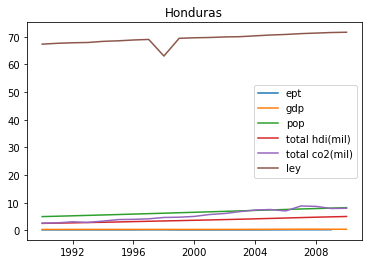

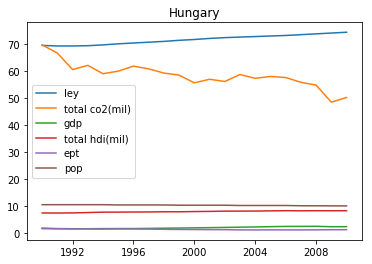

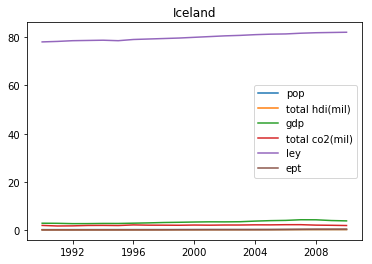

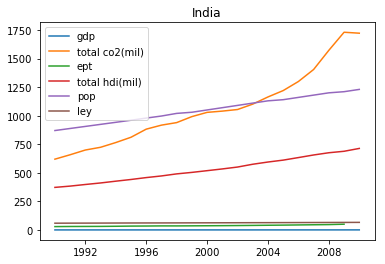

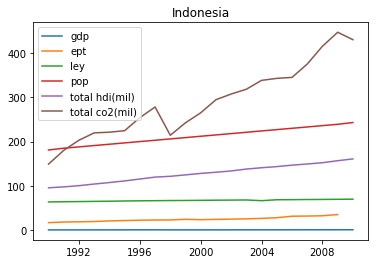

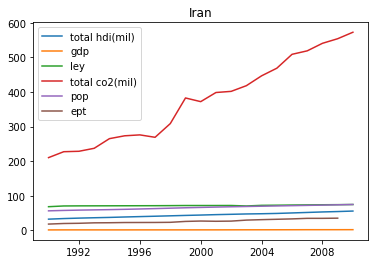

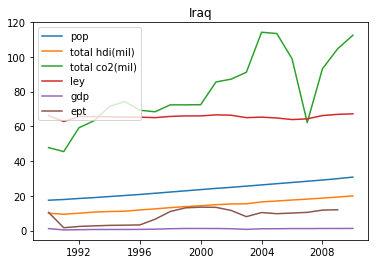

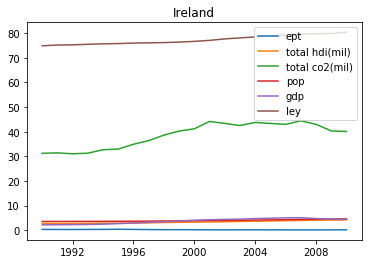

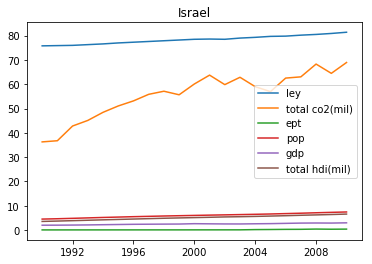

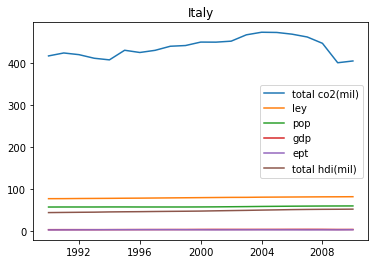

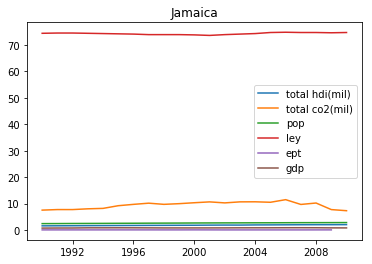

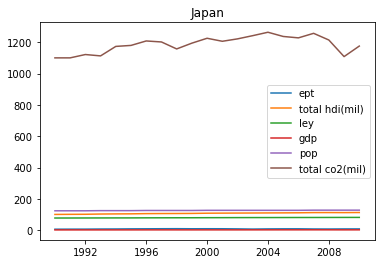

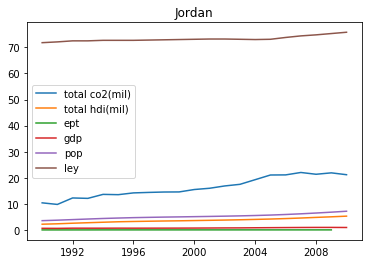

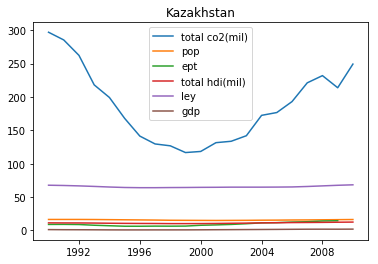

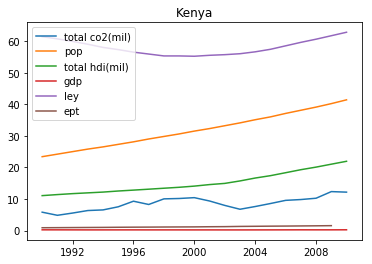

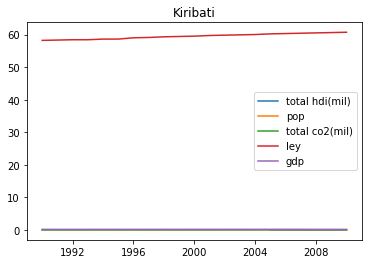

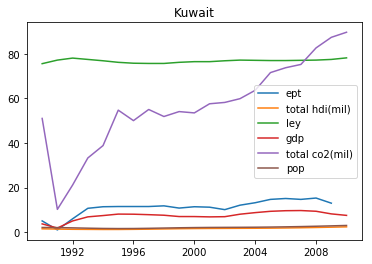

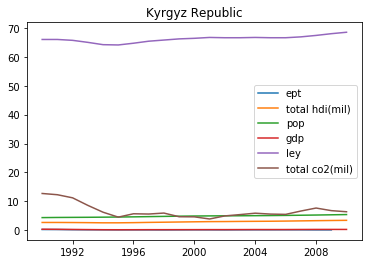

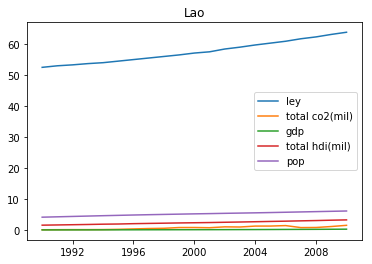

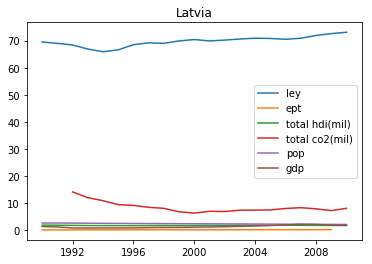

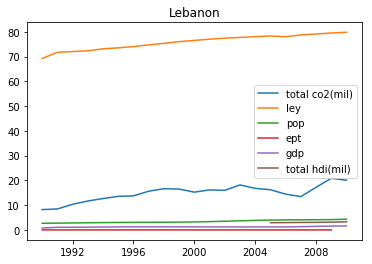

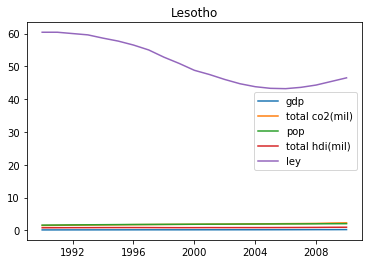

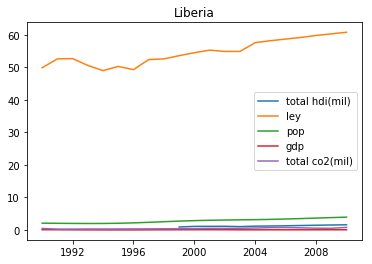

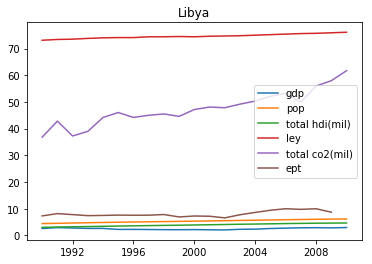

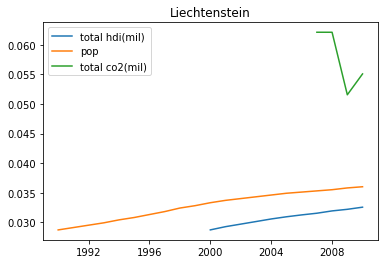

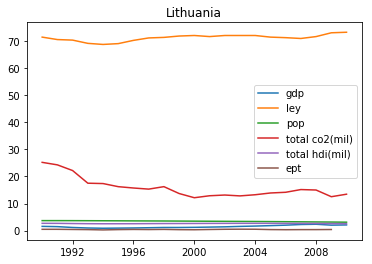

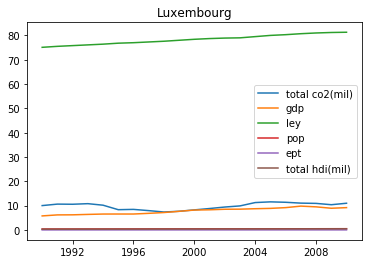

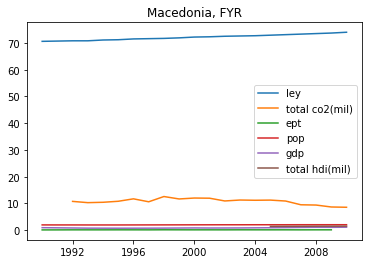

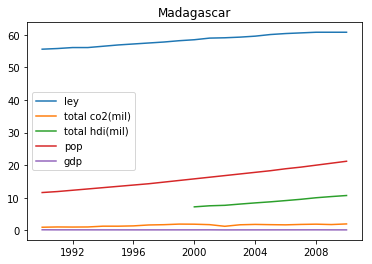

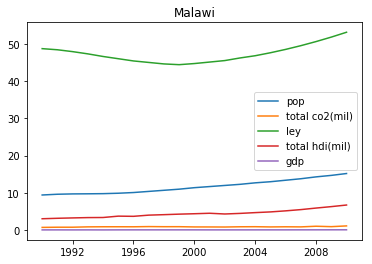

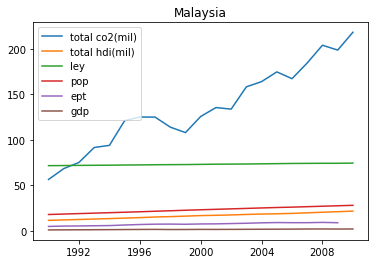

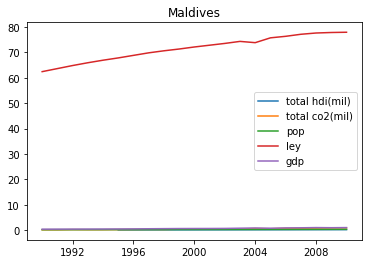

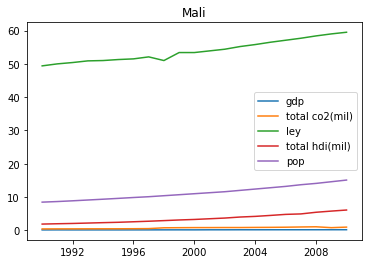

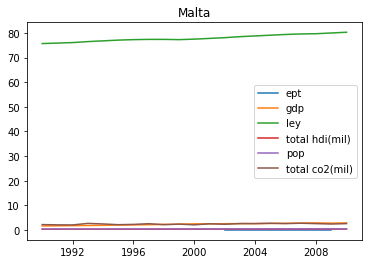

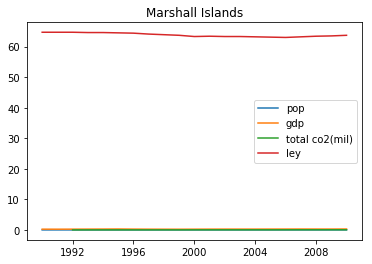

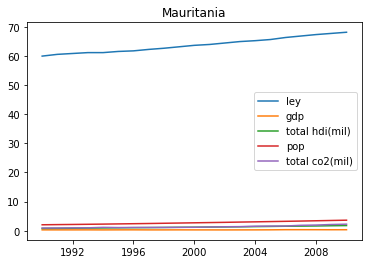

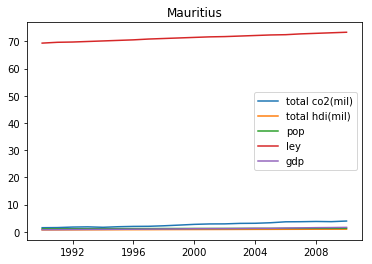

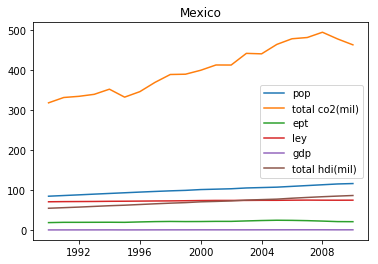

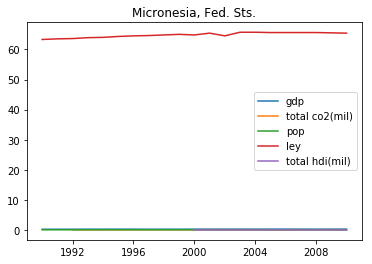

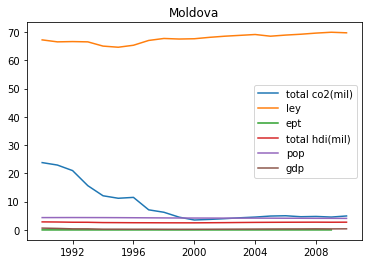

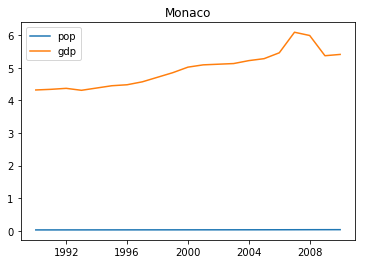

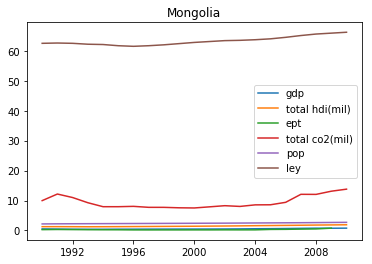

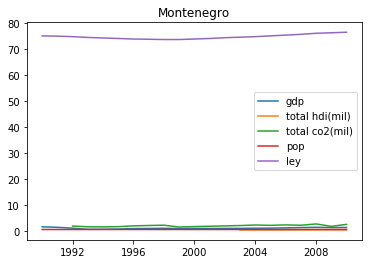

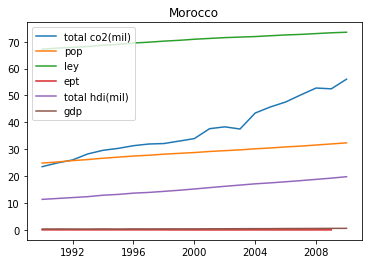

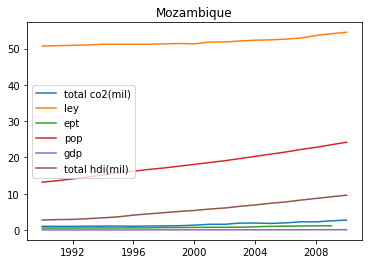

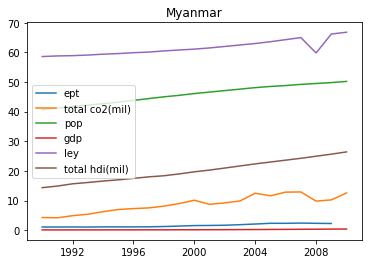

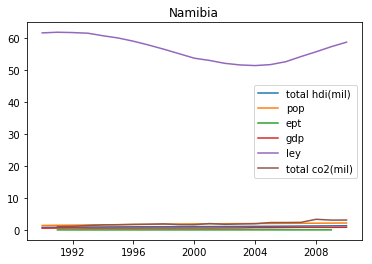

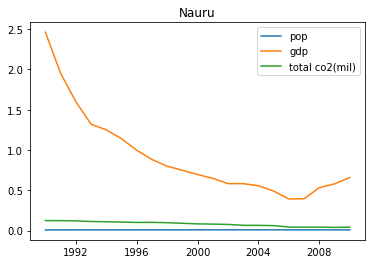

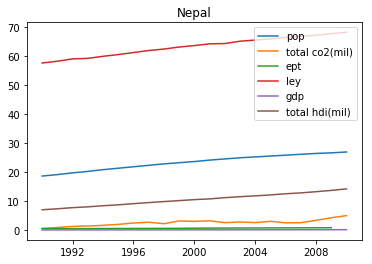

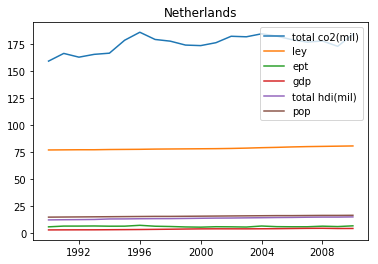

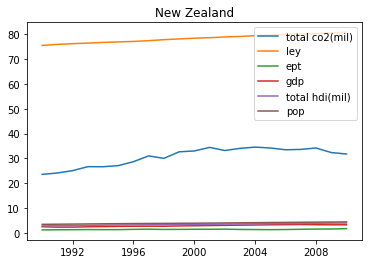

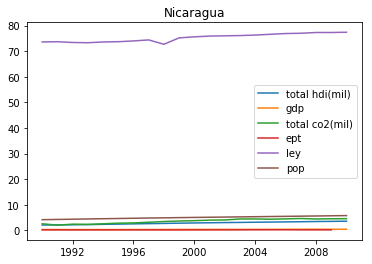

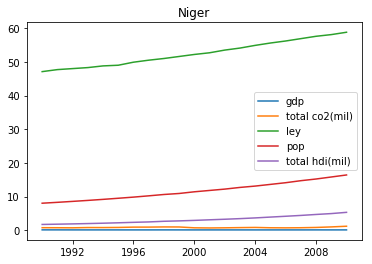

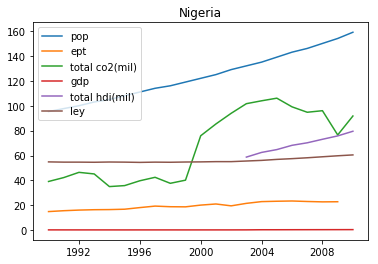

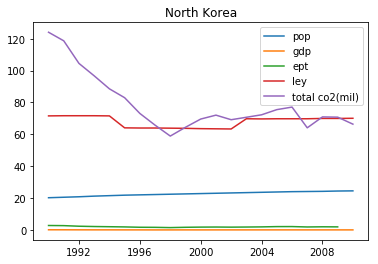

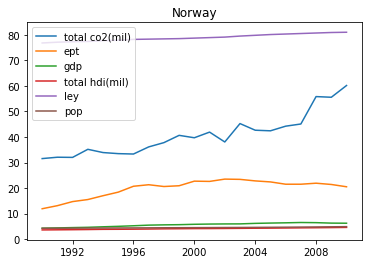

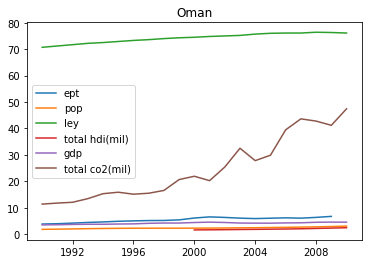

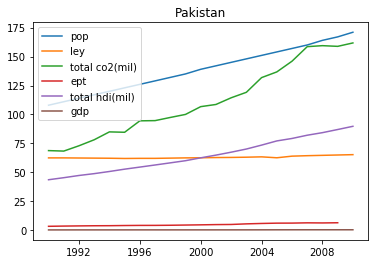

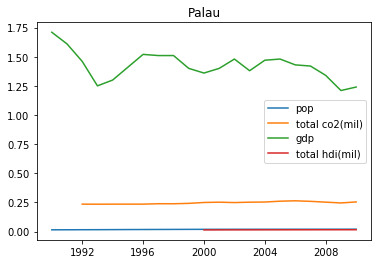

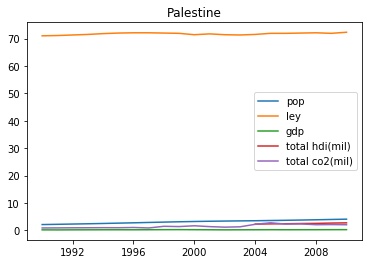

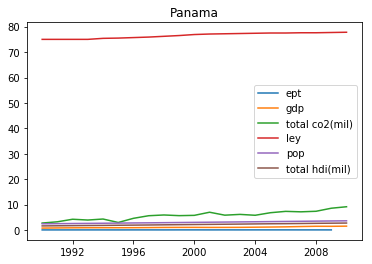

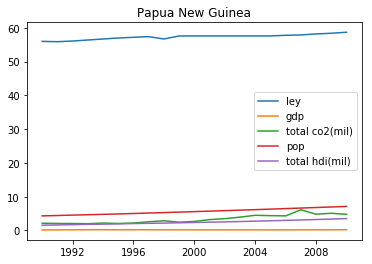

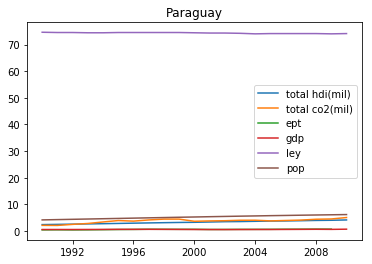

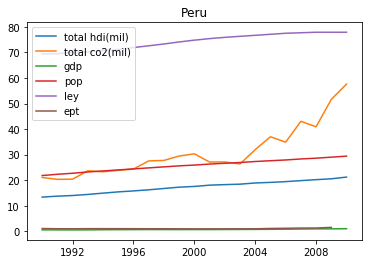

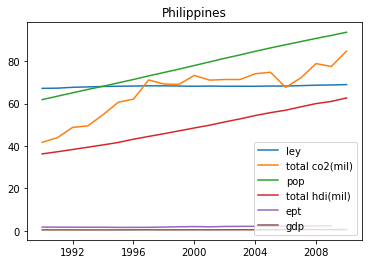

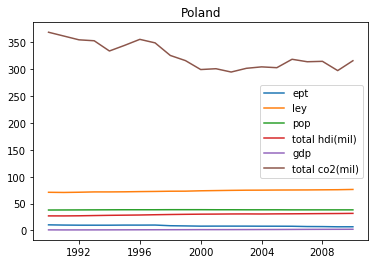

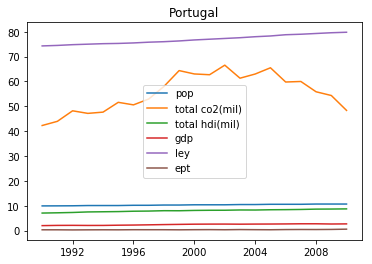

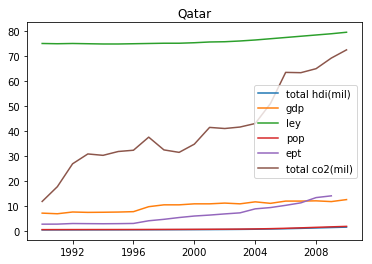

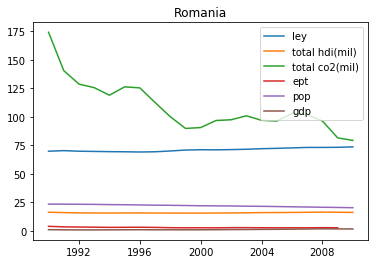

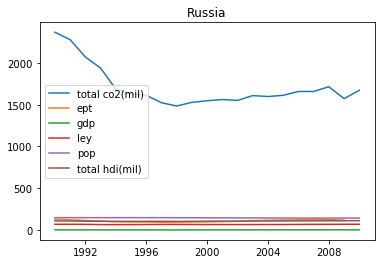

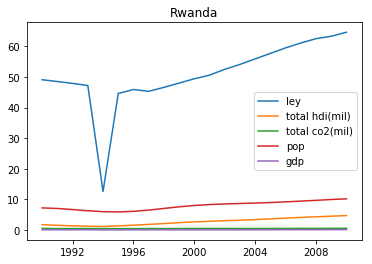

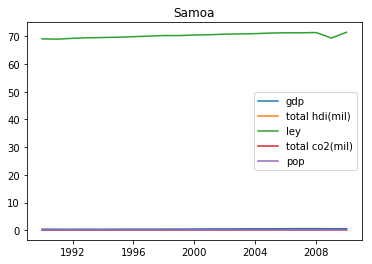

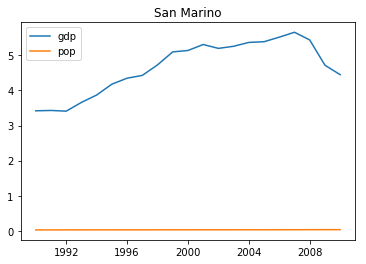

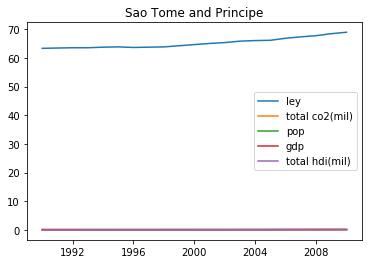

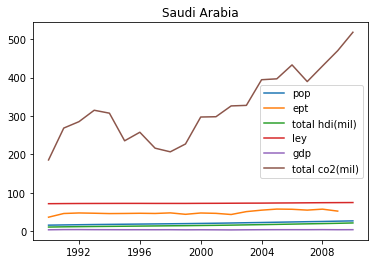

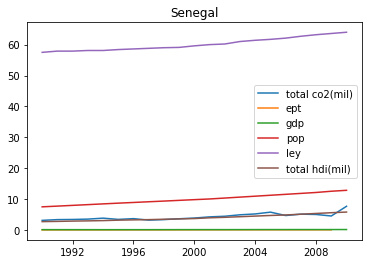

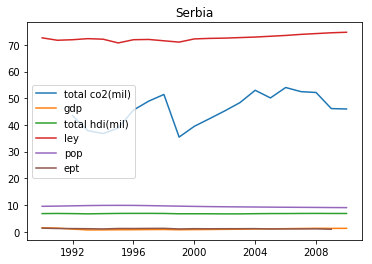

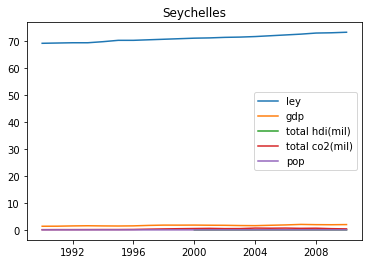

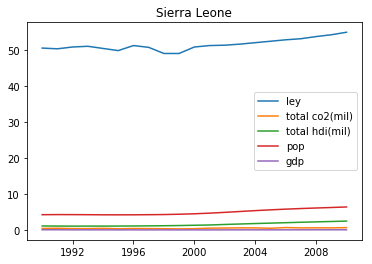

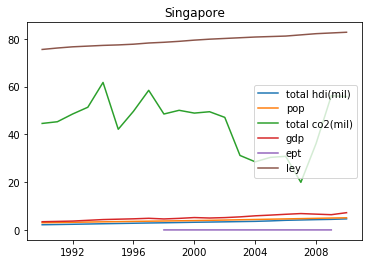

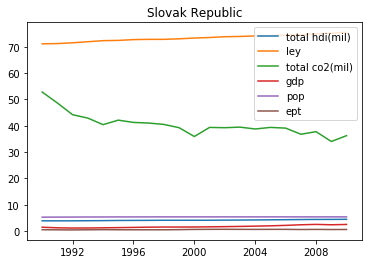

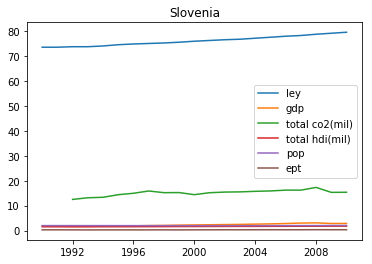

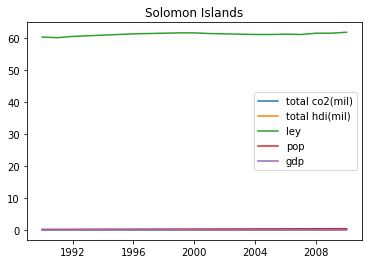

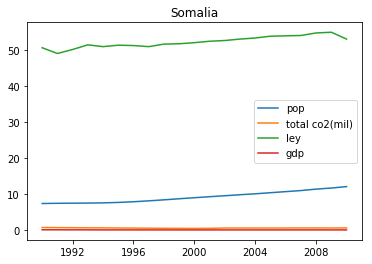

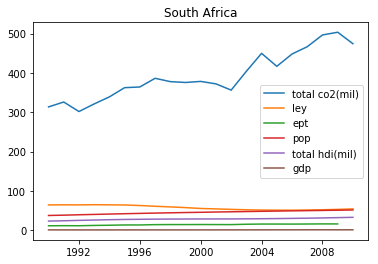

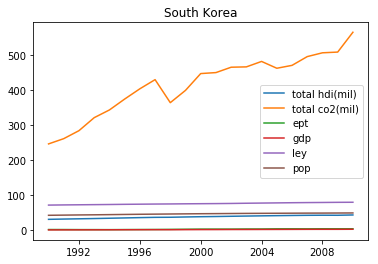

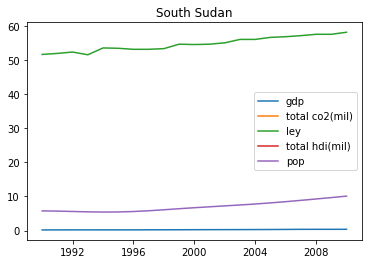

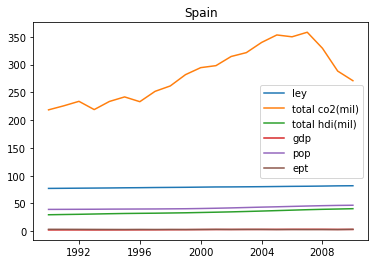

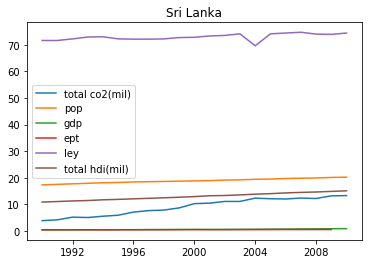

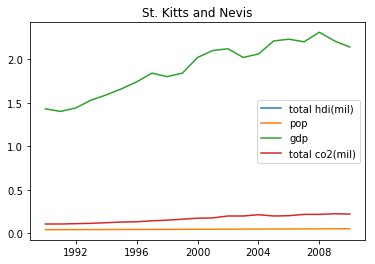

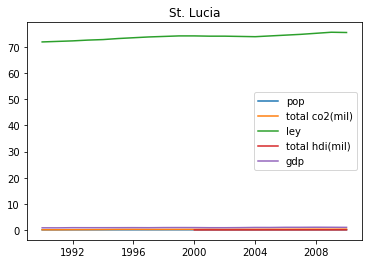

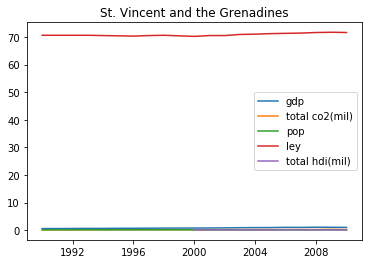

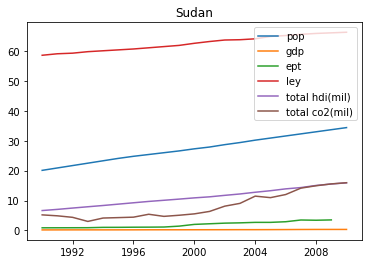

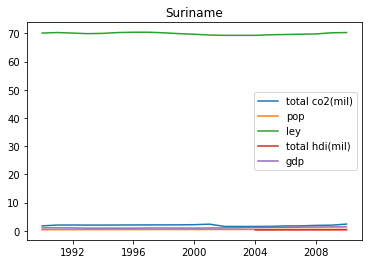

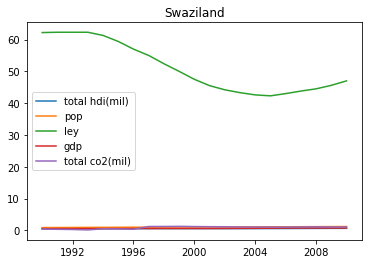

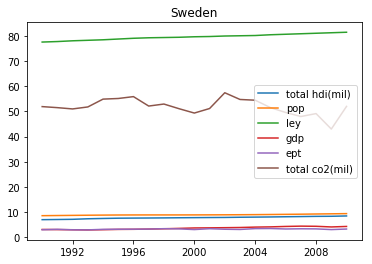

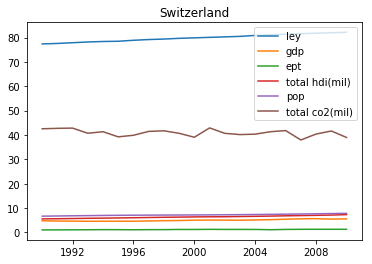

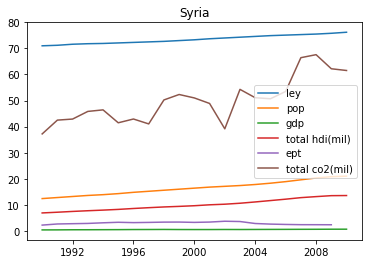

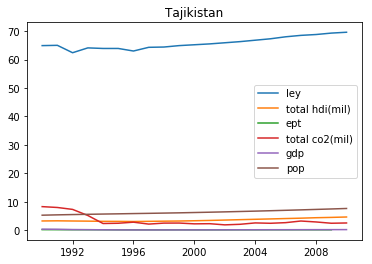

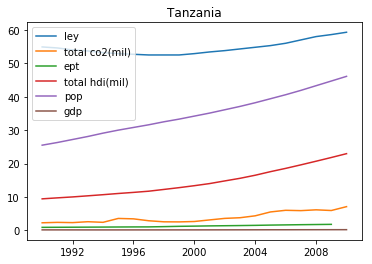

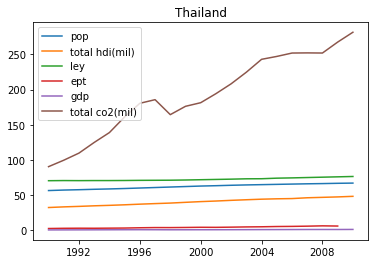

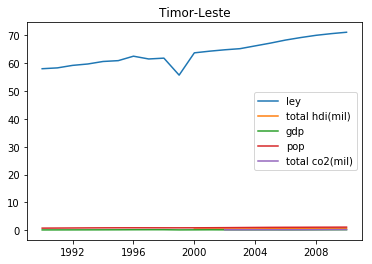

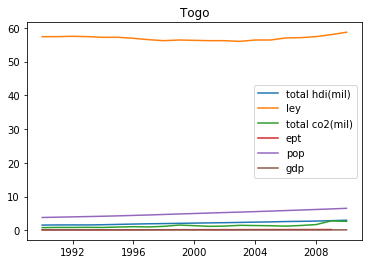

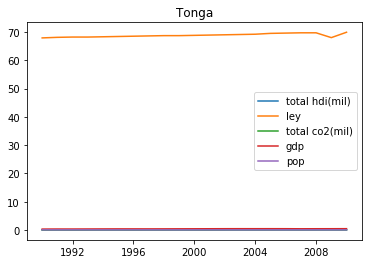

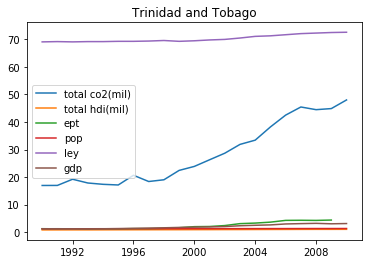

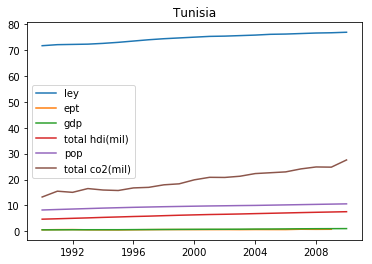

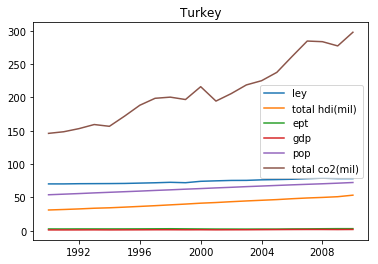

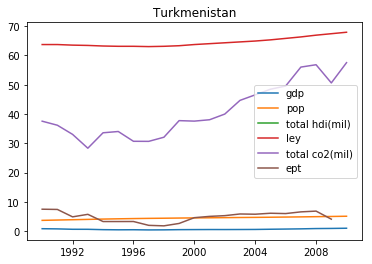

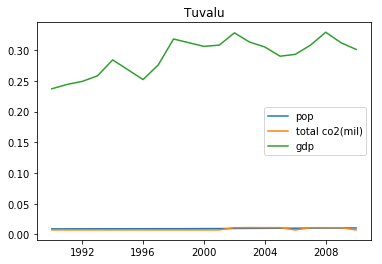

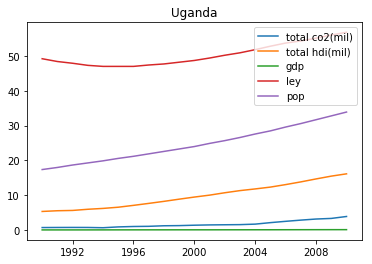

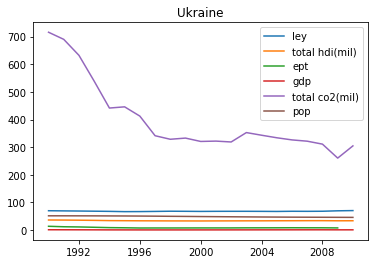

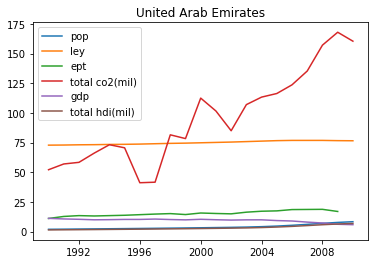

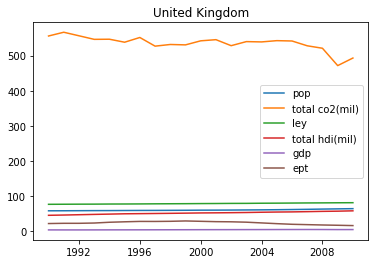

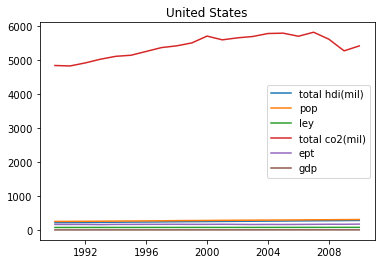

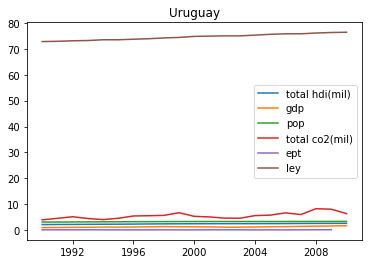

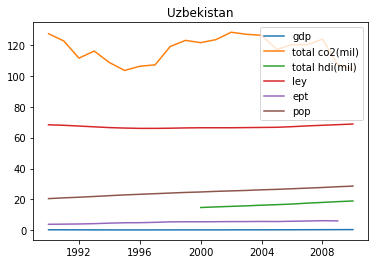

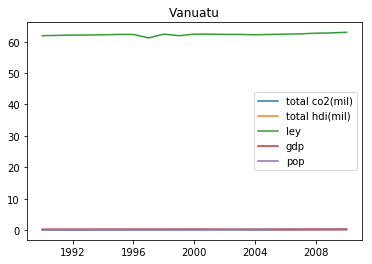

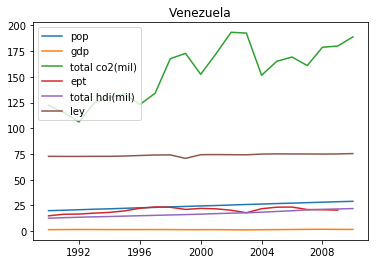

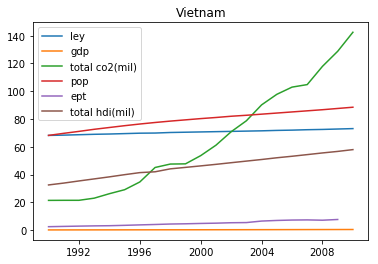

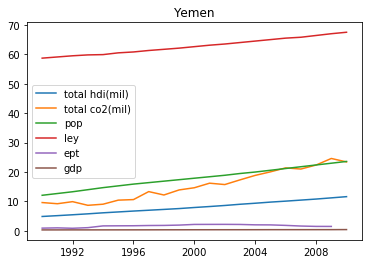

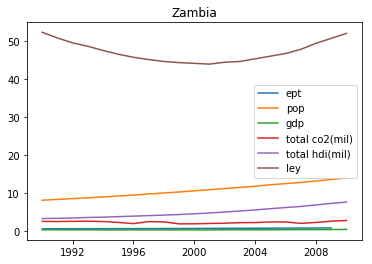

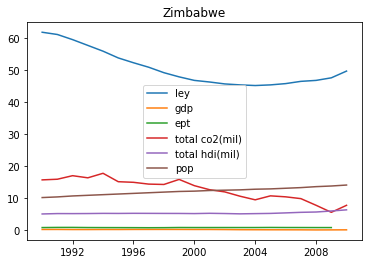

In [10]:
for country in all_df.reset_index().set_index(['country','info_type']).index.levels[0]:
    current_df = all_df.loc[country].transpose()
    for info in current_df.columns:
        if info in ['co2','hdi']:
            new_df = pd.DataFrame(current_df[info]*current_df['pop']/1000000).rename(columns={0 :'total '+info+'(mil)'})
            new_df.columns
            plt.plot(new_df['total '+info+'(mil)'])
        elif info == 'pop':
            plt.plot(current_df[info]/1000000)
        elif info in ['gdp','ept']:
            plt.plot(current_df[info]/10000)
        else:
            plt.plot(current_df[info])
    plt.legend()
    plt.title(country)
    plt.show();

1. Countries:

    * Botswana 
        * life expectancy curve 
    * Haiti 
        * life expectancy dipped linear drop (2010)
    * Burundi
        * life expectancy dipped (1992-1994)
    * Congo, Rep
        * life expectancy dipped (1995-1998)
    * Eritrea
        * life expectancy dipped (1998-2000)
    * Honduras
        * life expectancy dipped (1997-1999)
    * Lesotho
        * life expectancy curve 
    * Rwanda
        * life expectancy dipped (1993-1996)
    * Swaziland
        * life expectancy curve
    * Zimbabwe
        * life expectancy curve
2. Dates:
    * Added 1990->2000 to a file for interesting dates
        * A few countries have a dip in life expectancy between 1990 and 2000
        
**Questions**

*What happened between 1990 and 2000?*
* may have to pull more indicators

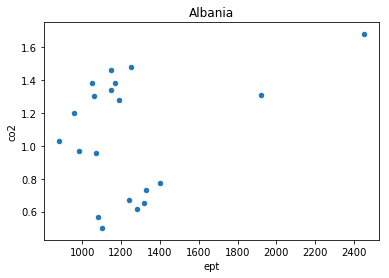

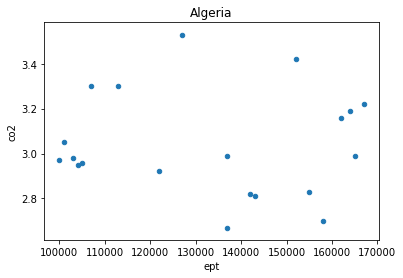

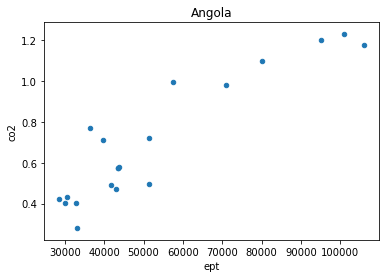

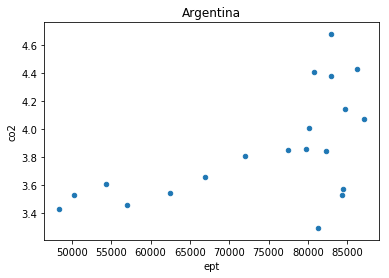

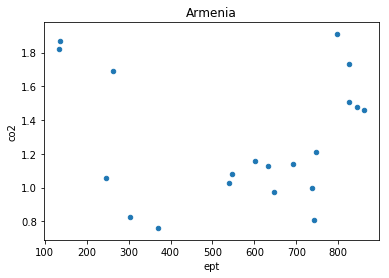

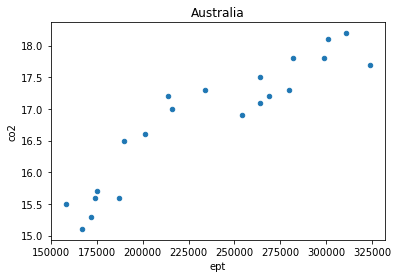

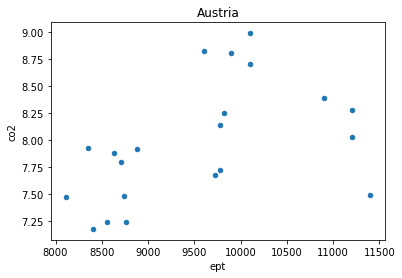

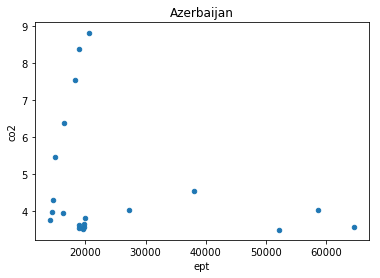

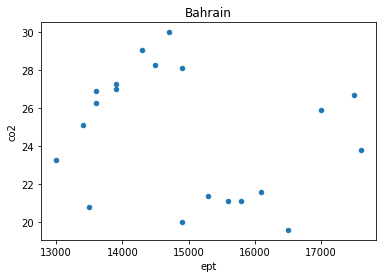

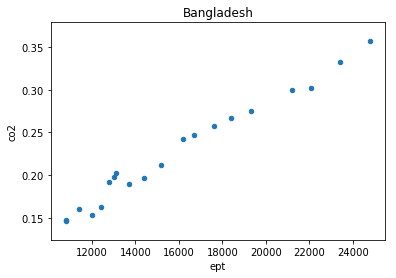

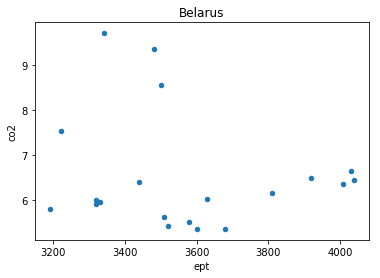

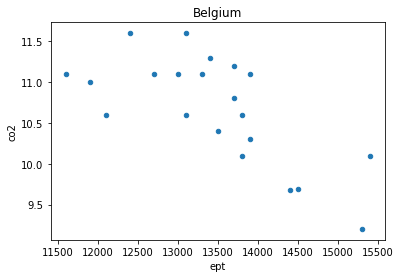

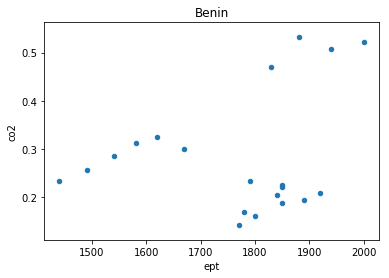

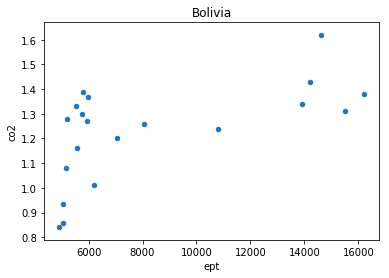

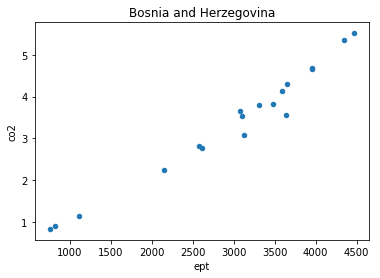

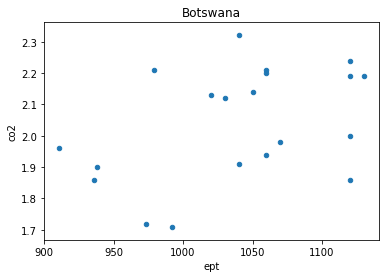

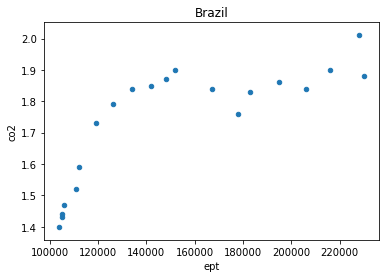

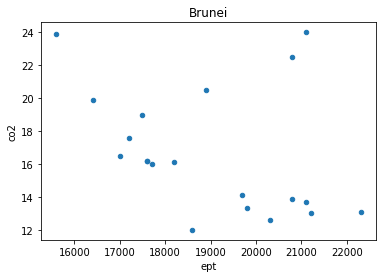

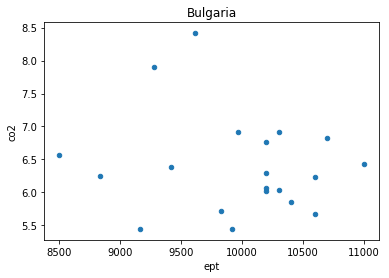

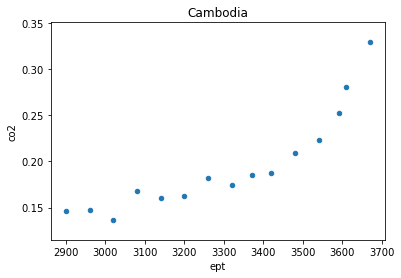

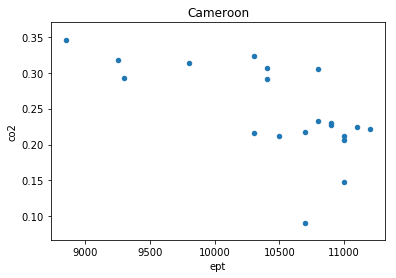

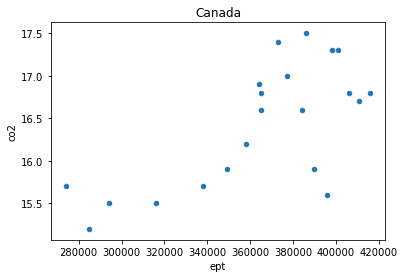

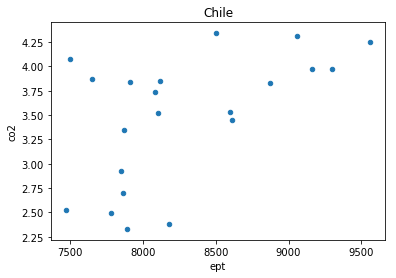

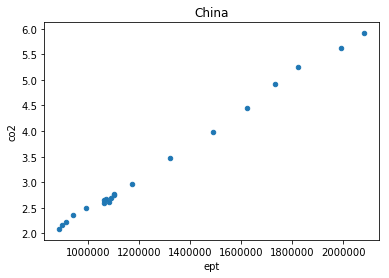

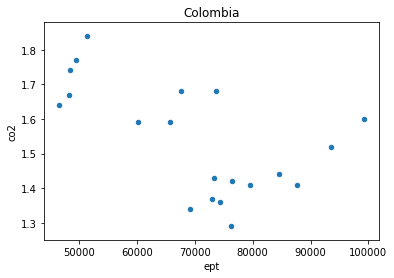

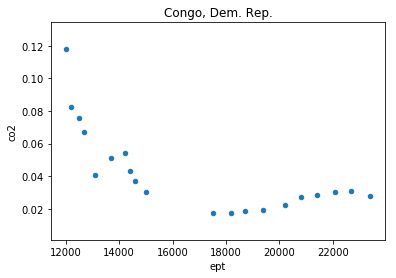

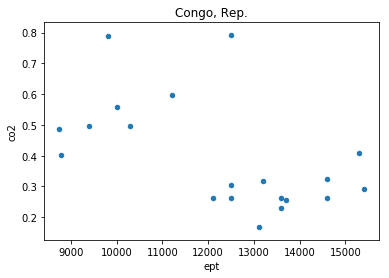

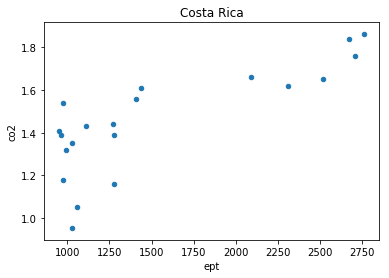

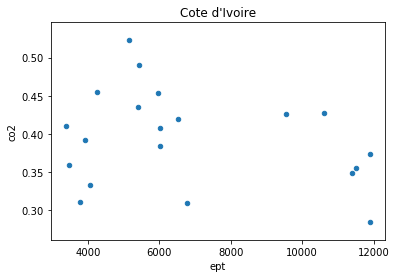

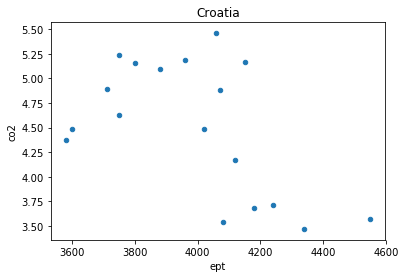

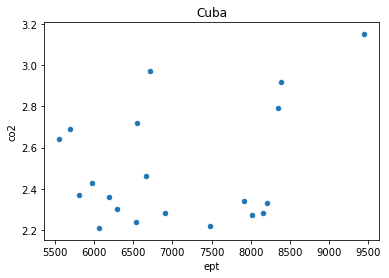

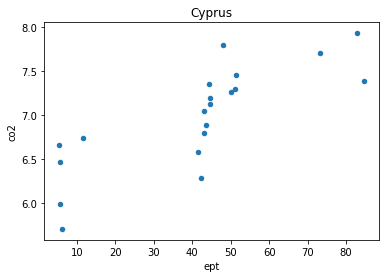

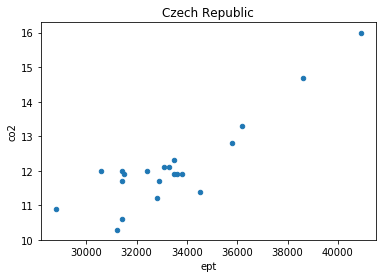

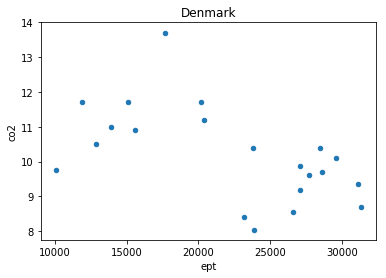

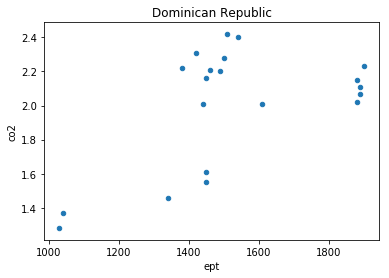

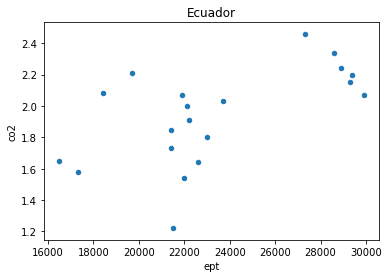

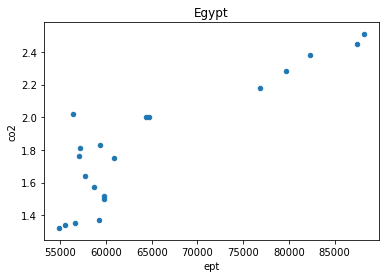

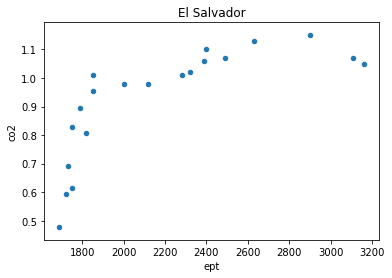

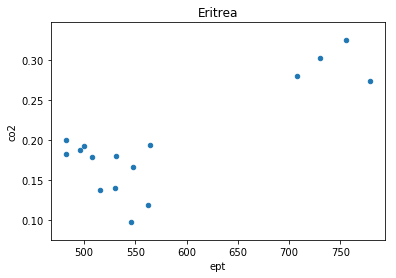

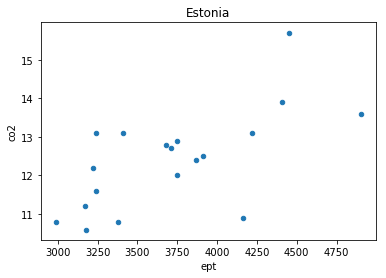

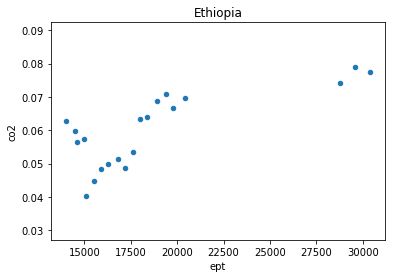

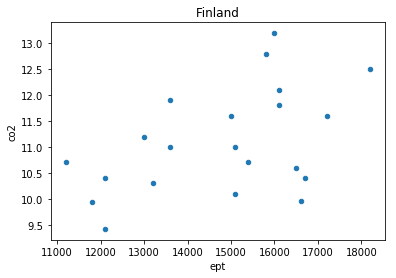

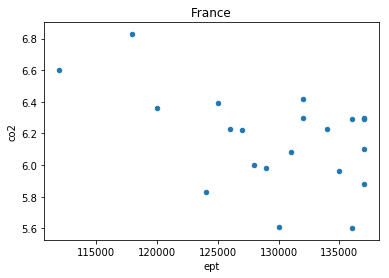

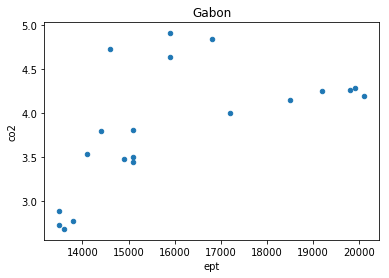

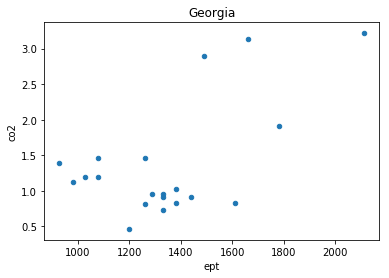

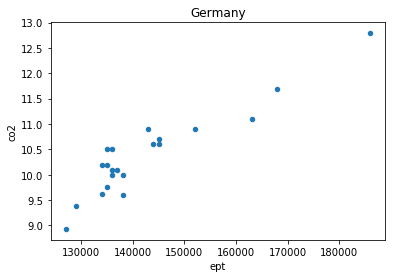

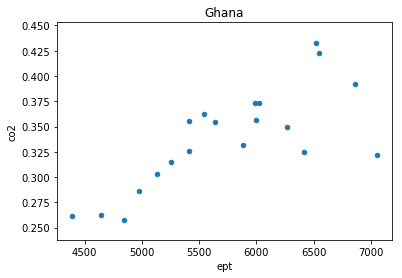

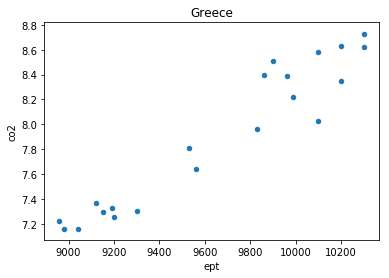

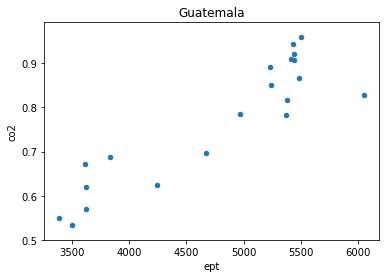

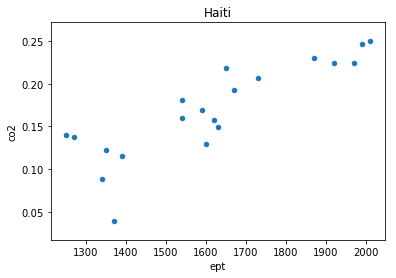

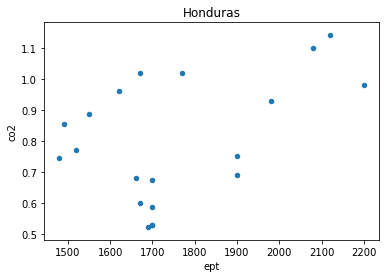

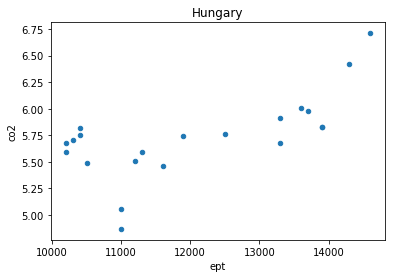

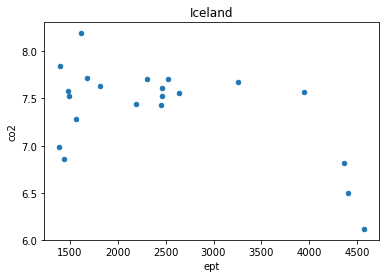

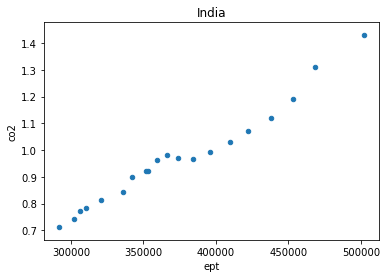

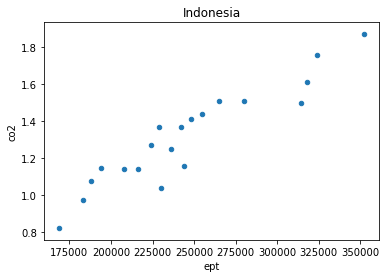

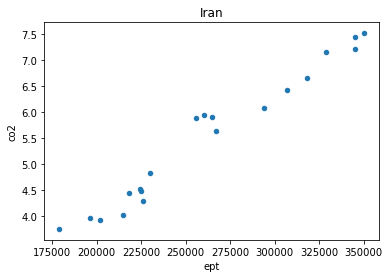

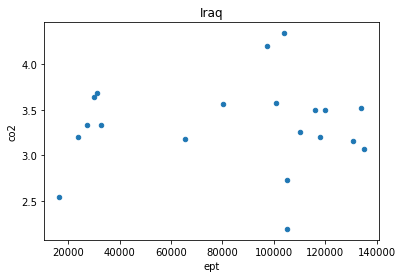

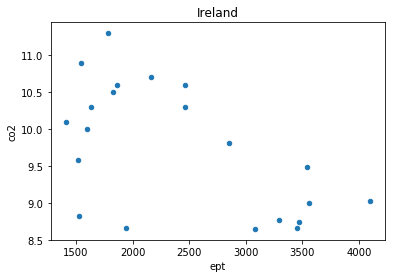

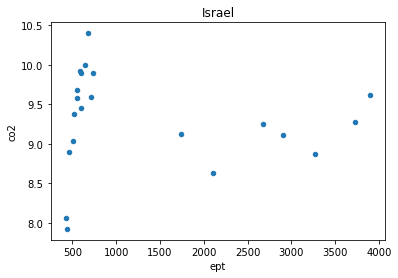

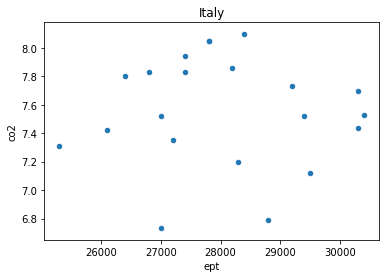

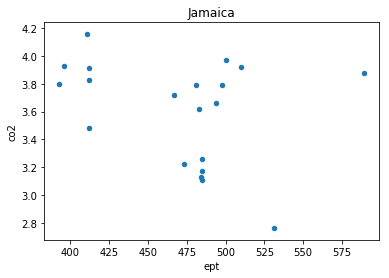

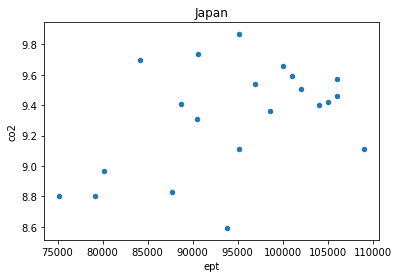

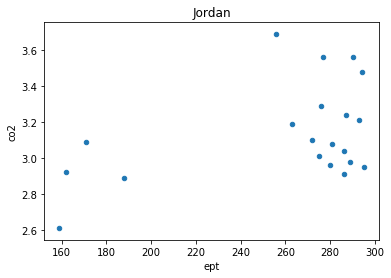

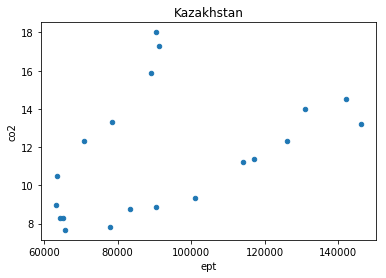

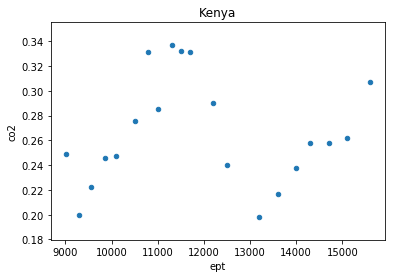

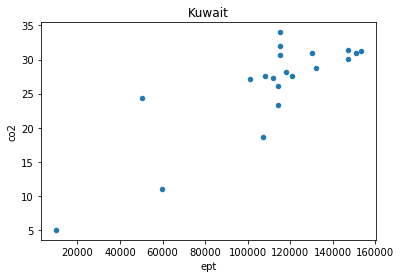

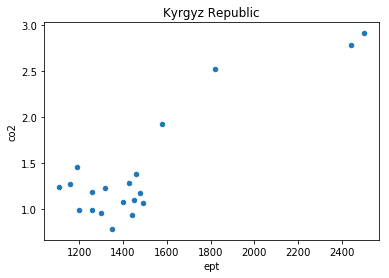

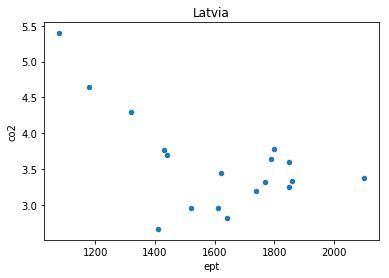

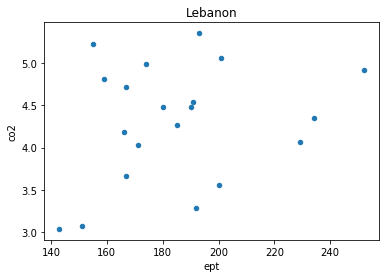

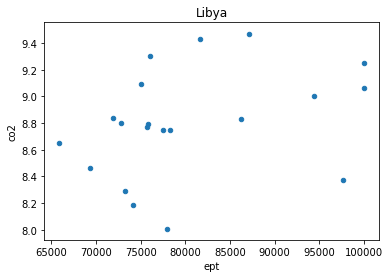

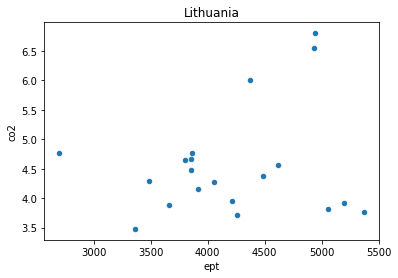

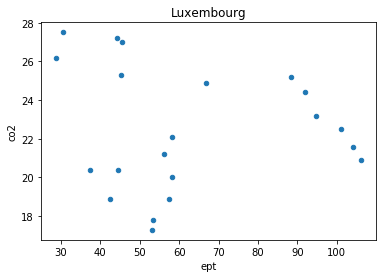

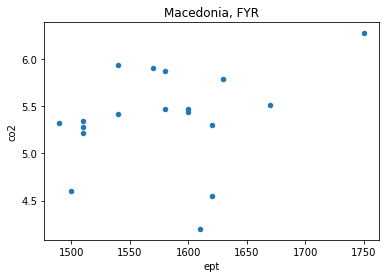

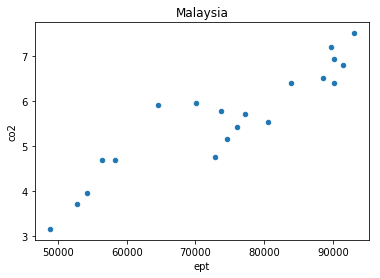

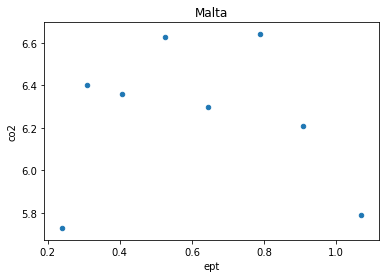

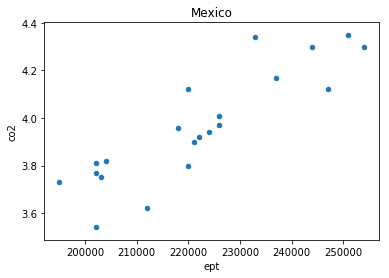

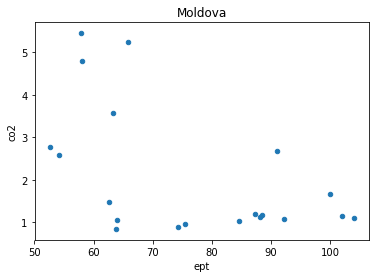

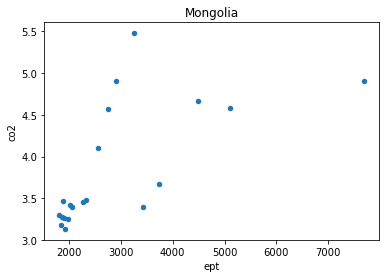

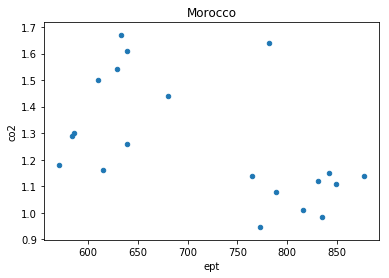

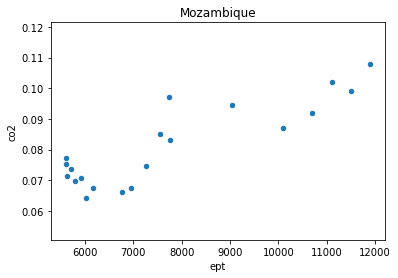

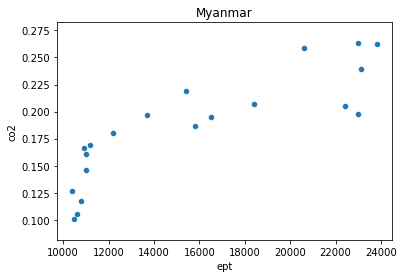

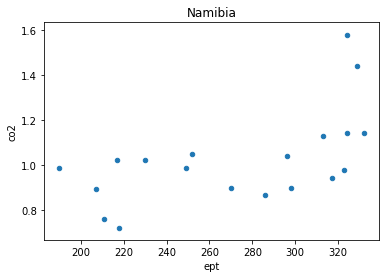

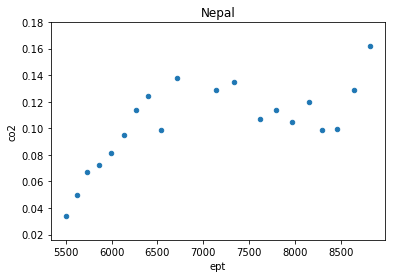

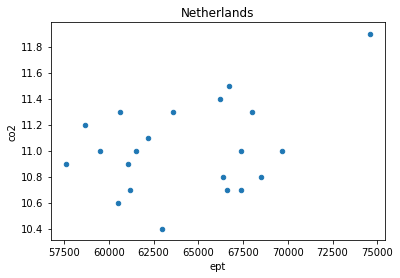

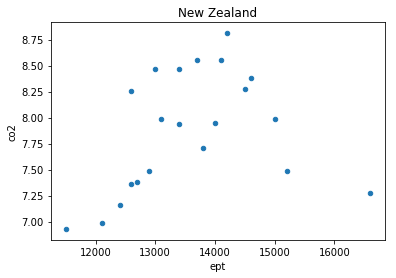

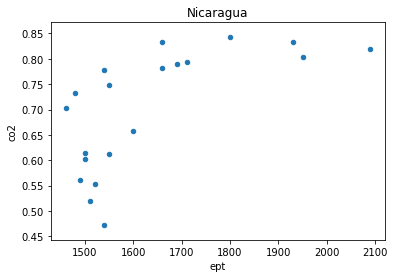

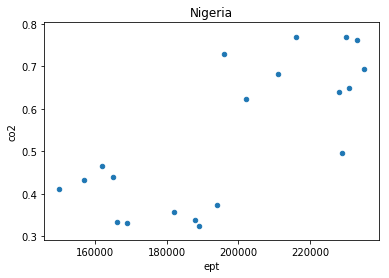

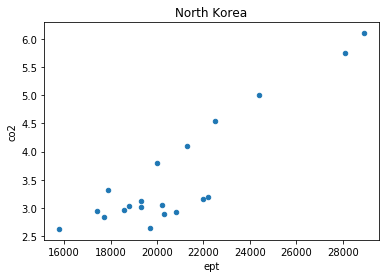

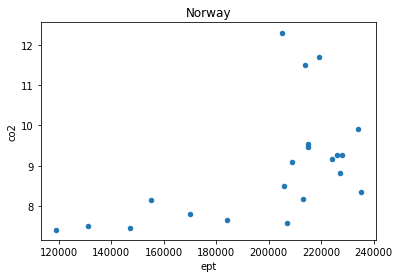

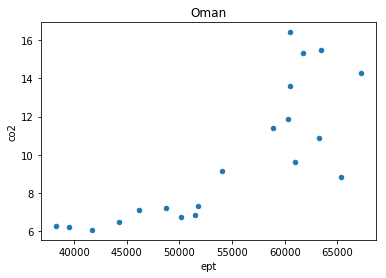

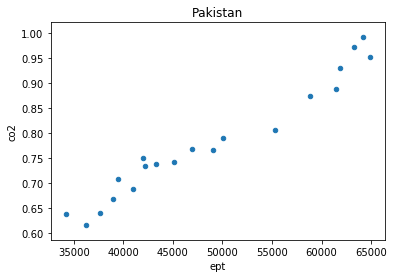

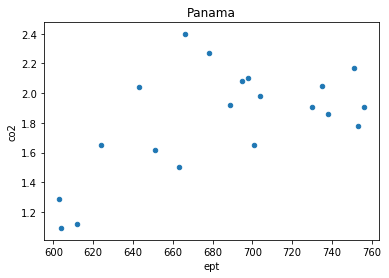

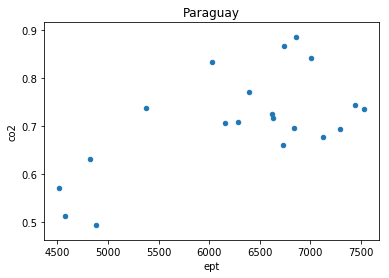

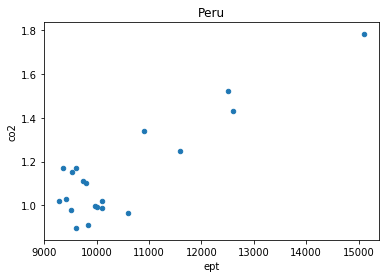

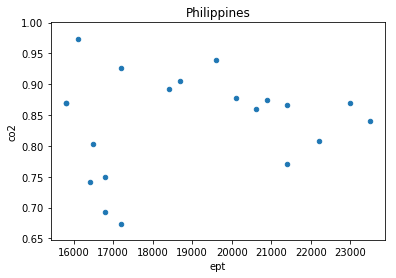

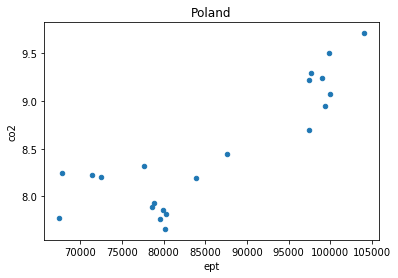

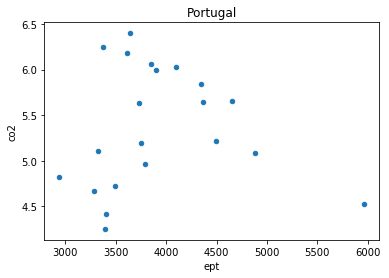

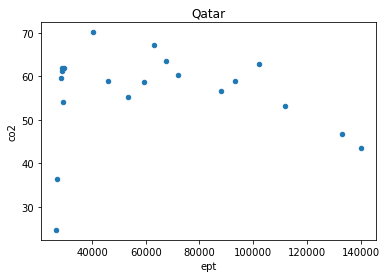

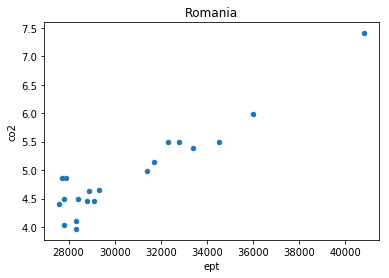

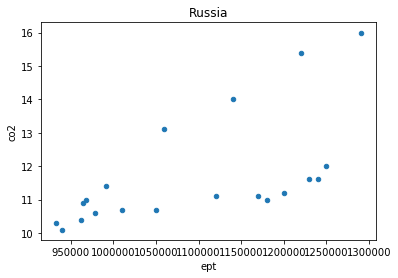

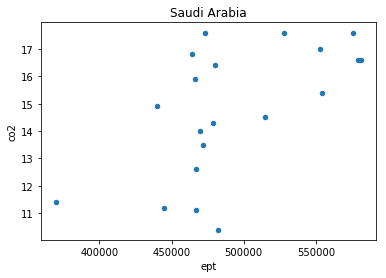

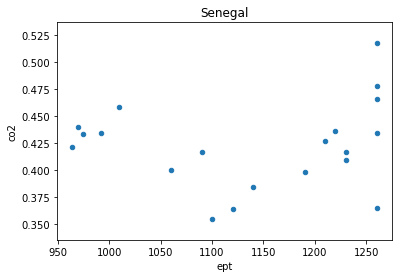

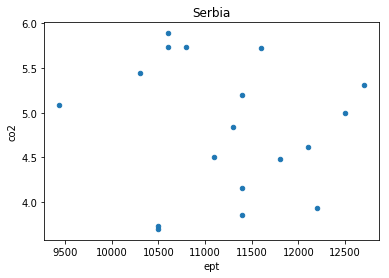

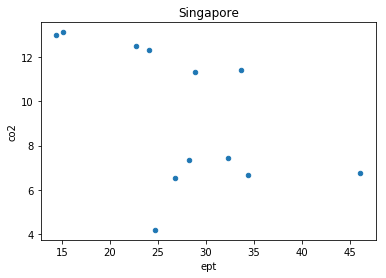

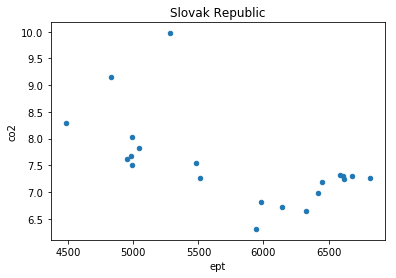

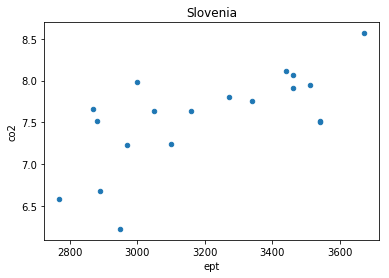

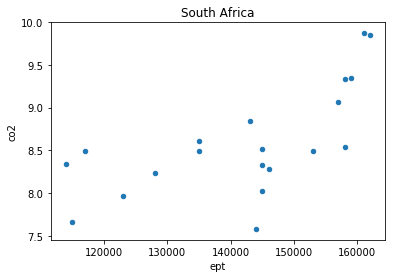

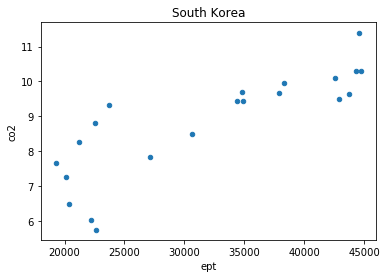

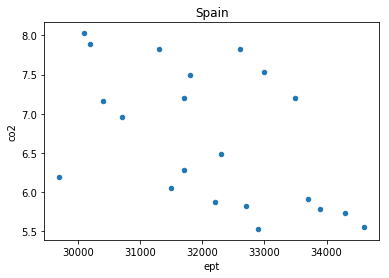

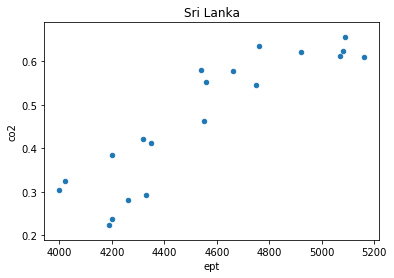

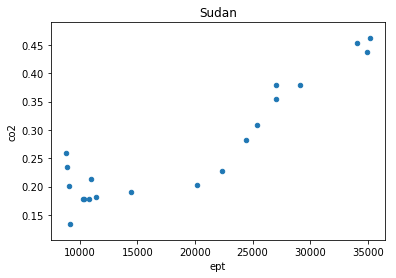

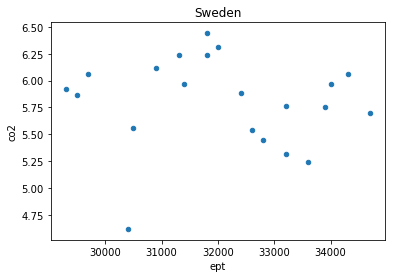

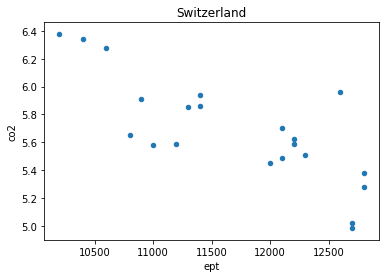

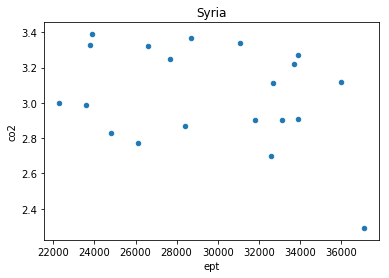

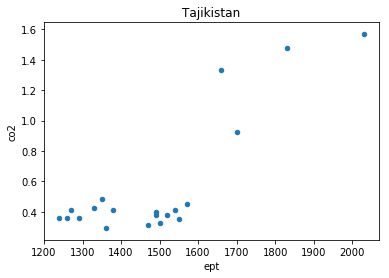

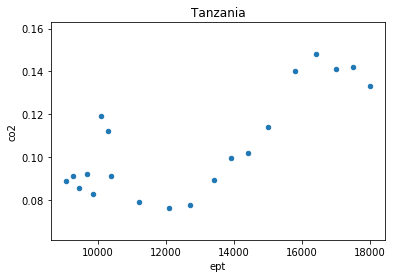

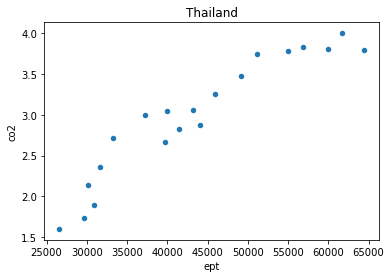

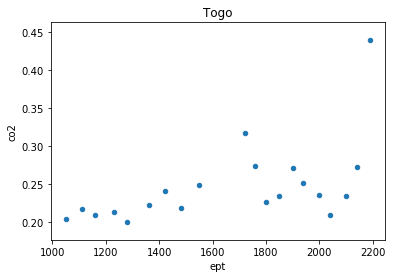

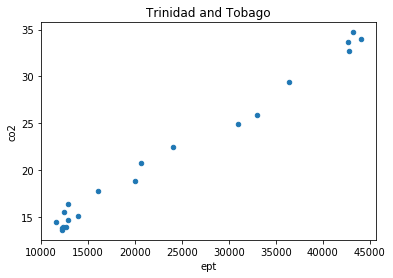

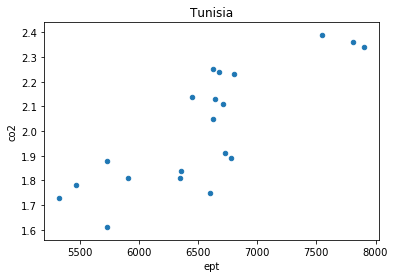

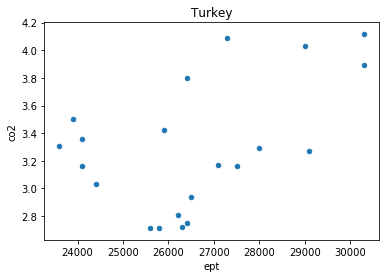

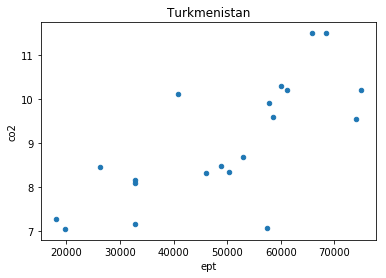

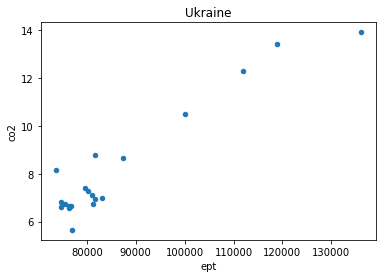

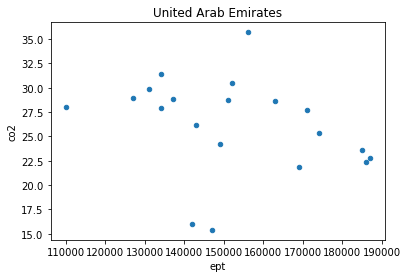

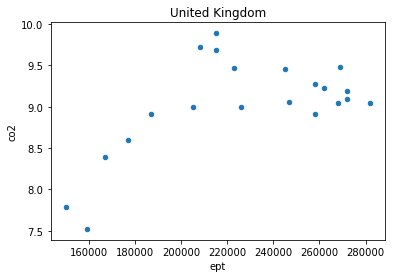

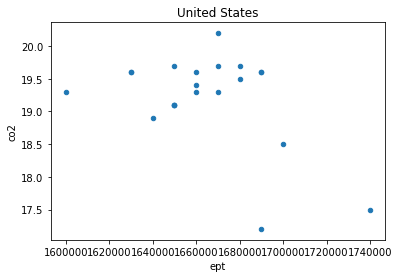

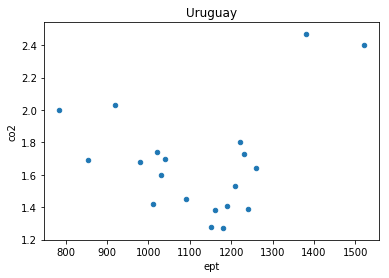

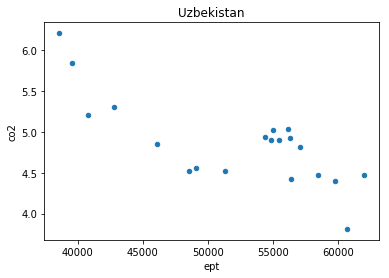

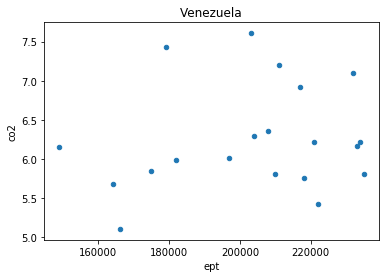

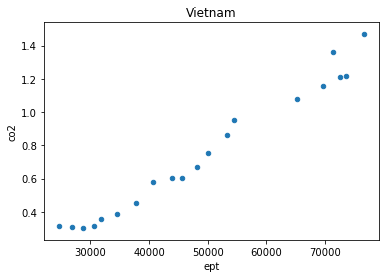

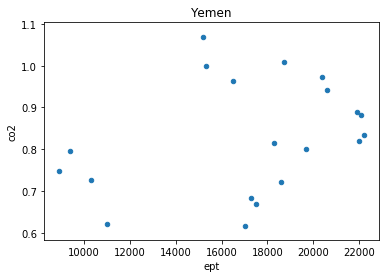

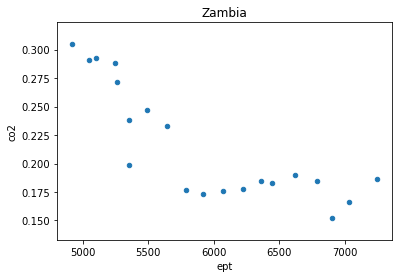

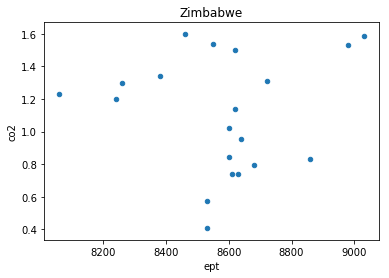

In [13]:
for country in all_df.index.levels[0]:
    current_df = all_df.loc[country].transpose()
    if 'ept' in current_df.columns and 'co2' in current_df.columns:
        current_df.plot(kind='scatter', x='ept', y='co2')
        plt.title(country)
        plt.show()

In [ ]:
for country in all_df.reset_index().set_index(['country','info_type']).index.levels[0]:
    current_df = all_df.loc[country].transpose()
    pd.plotting.scatter_matrix(current_df)
    plt.show();